# US Election between 1976-2020

I decided to work with dataset of US election between 1976-2020, consisting of over 4000 rows and 15 columns. Data was downloaded from Kaggle. I'd like to know more about US election between 1976-2020, and see if there is an interesting pattern or insight that wasn't discovered before. With this knowledge it might be possible to apply the results for further analysis of future elections. The main techniques used were extracting, cleaning, structuring, combining, grouping and visualizing dataset.

## Downloading the Dataset

To work with dataset lets download it from https://www.kaggle.com/tunguz/us-elections-dataset, using opendatasets library.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/tunguz/us-elections-dataset' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./us-elections-dataset" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './us-elections-dataset'

In [5]:
import os
os.listdir(data_dir)

['1976-2020-president.csv', '1976-2020-senate.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-starter"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dildar-ashirov/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter


'https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter'

## Data Preparation and Cleaning




In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import math as m

%matplotlib inline

In [11]:
import matplotlib


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
president_df = pd.read_csv('./us-elections-dataset/1976-2020-president.csv')

In [13]:
president_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


In [14]:
null_candidates_df = president_df[president_df.candidate.isnull()]

In [15]:
null_candidates_df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER
10,1976,ALASKA,AK,2,94,81,US PRESIDENT,NaN,NaN,True,1176,123574,20210113,NaN,OTHER
18,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,NaN,NaN,True,22,742719,20210113,NaN,OTHER
21,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,NaN,INDEPENDENT,False,639,767535,20210113,NaN,OTHER
45,1976,DELAWARE,DE,10,51,11,US PRESIDENT,NaN,NO PARTY AFFILIATION,False,2432,235642,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,2020,VERMONT,VT,50,13,6,US PRESIDENT,NaN,NaN,True,1942,370968,20210113,NaN,OTHER
4255,2020,VIRGINIA,VA,51,54,40,US PRESIDENT,NaN,NaN,True,19765,4460524,20210113,NaN,OTHER
4262,2020,WASHINGTON,WA,53,91,73,US PRESIDENT,NaN,NaN,True,27252,4087631,20210113,NaN,OTHER
4279,2020,WISCONSIN,WI,55,35,25,US PRESIDENT,NaN,NaN,True,6367,3298041,20210113,NaN,OTHER


### It seems like we have some NaN candidates and we do not want them somehow affect the results. Better to avoid them, but if we try to drop them then the count of total votes will change too, so we must change it accordingly

In [16]:
null_candidates_df.loc[null_candidates_df.index,'candidate'] = 'Unknown'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#### First we use the DataFrame of null candidates and took its indices, and we call only candidates' names, which are null, and set them to 'Unknown'. Thus we dropped null names.

# Odd candidates
Let's remove those candidates that don't make any sense and change the dataset accordingly with all total number of votes changed

In [17]:
undefined_candidates = ['BLANK VOTE/VOID VOTE/SCATTERING',
                                      'BLANK VOTES',
                                      'OVERVOTES',
                                      'UNDERVOTES',
                                      'VOID VOTE',
                                      'OTHERS',
                                      'THE BETTER LIFE,',
                                      'INDEPENDENT PARTY CANDIDATE,',
                                      'NONPARTISAN', 
                                      'WORKERS WORLD',
                                      'NONE OF THESE CANDIDATES',
                                      'BLANK VOTE',
                                      'OVER VOTE', 
                                      'NOT DESIGNATED',
                                      'PROHIBITION', 
                                      'UNAFFILIATED',
                                      'BLANK VOTE/SCATTERING', 
                                      'SCATTERING',
                                      'OTHER',
                                      'VOID',
                                      'NONE OF THE ABOVE'
                                      ]
not_candidates_df = president_df[president_df.candidate.apply(lambda x: True if x in undefined_candidates else False)]

not_valid_candidates_df = pd.concat([not_candidates_df,null_candidates_df], axis=0)

#### Candidates column also contains not valid candidate names and so better to find the rows where these names are present. For that purpose, we use apply() method to tell if candidate name is in our undefined_candidate list or not. If yes then we get a DataFrame of undefined candidates. Then we combine two DataFrames: 1st - null candidates and 2nd - undefined candidates.

In [18]:
mod_not_valid_candidates_df = not_valid_candidates_df.drop(columns=['candidate','state_po','state_fips','state_cen','state_ic','office','party_detailed','notes','version','writein','party_simplified'])

#### Since we are working with 'year', 'state', 'candidatevotes', and 'total_votes', we do not need  other columns, so we can drop them. I didn't take the column 'candidate', since we are not interested in the names of not valid candidates, right? So, we drop it too.

In [19]:
mod_not_valid_candidates_df = mod_not_valid_candidates_df.groupby(['year','state','totalvotes'])[['candidatevotes']].sum()

#### Now, we gonna calculate the number of votes at each election year by state, so that we could know how many votes can be ignored. To accomplish this we used groupby() method, taking 'year','state','totalvotes' as indices, and the sum of 'candidatevotes' column's values.

In [20]:
mod_not_valid_candidates_df = mod_not_valid_candidates_df.reset_index()
mod_not_valid_candidates_df['totalvotes'] = mod_not_valid_candidates_df.totalvotes.subtract(mod_not_valid_candidates_df.candidatevotes)

#### Since we already got the number of votes, we can subtract from total number of votes number of candidate votes, and assign these new values to 'totalvotes', so that we could update the total number of votes.

In [21]:
mod_not_valid_candidates_df.drop(columns='candidatevotes', inplace=True)

#### Now, we don't need the column 'candidatevotes' since it played it's role in our calculation.

In [22]:
president_df.drop(columns=['notes','state_po','version','state_cen','state_ic','office','party_detailed'], inplace=True)

#### Now, lets remove some columns that are obviously will not be necessary to work with.

In [23]:
president_df = president_df.drop(not_valid_candidates_df.index)

#### We can drop those unvalid candidates from the dataset by dropping the indices of unvalid candidates accordingly and update the dataset.

In [24]:
president_df

,year,state,state_fips,candidate,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,1,"CARTER, JIMMY",False,659170,1182850,DEMOCRAT
1,1976,ALABAMA,1,"FORD, GERALD",False,504070,1182850,REPUBLICAN
2,1976,ALABAMA,1,"MADDOX, LESTER",False,9198,1182850,OTHER
3,1976,ALABAMA,1,"BUBAR, BENJAMIN """"BEN""""",False,6669,1182850,OTHER
4,1976,ALABAMA,1,"HALL, GUS",False,1954,1182850,OTHER
...,...,...,...,...,...,...,...,...
4278,2020,WISCONSIN,55,"CHARLES, MARK",True,52,3298041,OTHER
4280,2020,WYOMING,56,"BIDEN, JOSEPH R. JR",False,73491,278503,DEMOCRAT
4281,2020,WYOMING,56,"TRUMP, DONALD J.",False,193559,278503,REPUBLICAN
4282,2020,WYOMING,56,"JORGENSEN, JO",False,5768,278503,LIBERTARIAN


#### Here, we got the dataset with all invalid candidates removed.

In [25]:
merged_president_df = pd.merge(left=president_df, right=mod_not_valid_candidates_df, on=['year','state'], how='outer')

#### We've already updated the 'totalvotes', now we update the dataset too by using merge() method, adding a DataFrame of new 'totalvotes' to the dataset, normalizing based on two columns 'year' and 'state'. We used parameter 'outer', since the dataset contains some states with total votes that are not present in updated 'totalvotes' DataFrame.

In [26]:
merged_president_df.rename(columns={'totalvotes_x':'totalvotes'}, inplace=True)

#### Thus, we get a new column named 'totalvotes_y' with updated values added to the dataset.

In [27]:
merged_president_df[(merged_president_df.year == 1976) & (merged_president_df.state == 'CALIFORNIA')]

,year,state,state_fips,candidate,writein,candidatevotes,totalvotes,party_simplified,totalvotes_y
19,1976,CALIFORNIA,6,"FORD, GERALD",False,3882244,7803770,REPUBLICAN,NaN
20,1976,CALIFORNIA,6,"CARTER, JIMMY",False,3742284,7803770,DEMOCRAT,NaN
21,1976,CALIFORNIA,6,"MACBRIDE, ROGER",False,56388,7803770,OTHER,NaN
22,1976,CALIFORNIA,6,"MADDOX, LESTER",False,51098,7803770,OTHER,NaN
23,1976,CALIFORNIA,6,"WRIGHT, MARGARET",False,41731,7803770,OTHER,NaN
24,1976,CALIFORNIA,6,"CAMEJO, PETER",False,17259,7803770,OTHER,NaN
25,1976,CALIFORNIA,6,"HALL, GUS",False,12766,7803770,OTHER,NaN


#### In some rows, totalvotes_y has NaN values. It's not what we want, so we gonna assign the values of 'totalvotes' to 'totalvotes_y' where the last's value is NaN. And obviously, assign values of 'totalvotes_y' to 'totalvotes' where 'totalvotes_y' values are not NaN.

In [28]:
merged_president_df.totalvotes = merged_president_df.totalvotes.combine(merged_president_df.totalvotes_y, min, fill_value=merged_president_df.totalvotes)
merged_president_df.drop(columns='totalvotes_y', inplace=True)

#### To accomplish above task, we use combine() method, taking the minimum of 'totalvotes' values, and value of 'totalvotes' if 'totalvotes_y' is NaN. Then, we can drop the column 'totalvotes_y', as it served well and we do not need it anymore.

In [29]:
merged_president_df

,year,state,state_fips,candidate,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,1,"CARTER, JIMMY",False,659170,1182542,DEMOCRAT
1,1976,ALABAMA,1,"FORD, GERALD",False,504070,1182542,REPUBLICAN
2,1976,ALABAMA,1,"MADDOX, LESTER",False,9198,1182542,OTHER
3,1976,ALABAMA,1,"BUBAR, BENJAMIN """"BEN""""",False,6669,1182542,OTHER
4,1976,ALABAMA,1,"HALL, GUS",False,1954,1182542,OTHER
...,...,...,...,...,...,...,...,...
3806,2020,WISCONSIN,55,"CHARLES, MARK",True,52,3291674,OTHER
3807,2020,WYOMING,56,"BIDEN, JOSEPH R. JR",False,73491,275026,DEMOCRAT
3808,2020,WYOMING,56,"TRUMP, DONALD J.",False,193559,275026,REPUBLICAN
3809,2020,WYOMING,56,"JORGENSEN, JO",False,5768,275026,LIBERTARIAN


In [30]:
merged_president_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3811 entries, 0 to 3810
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              3811 non-null   int64 
 1   state             3811 non-null   object
 2   state_fips        3811 non-null   int64 
 3   candidate         3811 non-null   object
 4   writein           3809 non-null   object
 5   candidatevotes    3811 non-null   int64 
 6   totalvotes        3811 non-null   int64 
 7   party_simplified  3811 non-null   object
dtypes: int64(4), object(4)
memory usage: 397.0+ KB


In [31]:
merged_president_df.writein.unique()

array([False, True, nan], dtype=object)

#### It seems like we have some null values in the column 'writein'. Lets decide what to do with it.

In [32]:
merged_president_df.loc[(merged_president_df.writein != False) & (merged_president_df.writein != True), 'writein'] = True

#### We decided to assign 'writein' values, where it is null, True value since obviously if this candidates were already be there then no problem, but since it is null, then it is highly probable that value is True, and these candidates are write-in candidates.

In [33]:
merged_president_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3811 entries, 0 to 3810
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              3811 non-null   int64 
 1   state             3811 non-null   object
 2   state_fips        3811 non-null   int64 
 3   candidate         3811 non-null   object
 4   writein           3811 non-null   object
 5   candidatevotes    3811 non-null   int64 
 6   totalvotes        3811 non-null   int64 
 7   party_simplified  3811 non-null   object
dtypes: int64(4), object(4)
memory usage: 397.0+ KB


#### Let's check for duplicates

In [34]:
duplicated_df = merged_president_df.loc[merged_president_df.duplicated(subset=['year','state','candidate'], keep=False)]

In [35]:
duplicated_df

,year,state,state_fips,candidate,writein,candidatevotes,totalvotes,party_simplified
185,1976,NEW YORK,36,"CARTER, JIMMY",False,3244165,6525225,DEMOCRAT
186,1976,NEW YORK,36,"FORD, GERALD",False,2825913,6525225,REPUBLICAN
187,1976,NEW YORK,36,"FORD, GERALD",False,274878,6525225,OTHER
188,1976,NEW YORK,36,"CARTER, JIMMY",False,145393,6525225,OTHER
516,1980,NEW YORK,36,"REAGAN, RONALD",False,2637700,6200895,REPUBLICAN
...,...,...,...,...,...,...,...,...
3205,2016,NEW YORK,36,"TRUMP, DONALD J.",False,292392,7660190,OTHER
3206,2016,NEW YORK,36,"CLINTON, HILLARY",False,140041,7660190,OTHER
3207,2016,NEW YORK,36,"JOHNSON, GARY",False,119156,7660190,OTHER
3209,2016,NEW YORK,36,"JOHNSON, GARY",False,57442,7660190,LIBERTARIAN


#### It looks like we have some duplicated rows only with following column values different: 'candidatevotes' and 'party_simplified' 

In [36]:
duplicated_df.groupby(['year','state','candidate'])['party_simplified'].value_counts()

year  state           candidate                  party_simplified
1976  NEW YORK        CARTER, JIMMY              DEMOCRAT            1
                                                 OTHER               1
                      FORD, GERALD               OTHER               1
                                                 REPUBLICAN          1
1980  NEW YORK        REAGAN, RONALD             OTHER               1
                                                 REPUBLICAN          1
1984  NEW YORK        MONDALE, WALTER            DEMOCRAT            1
                                                 OTHER               1
                      REAGAN, RONALD             OTHER               1
                                                 REPUBLICAN          1
1988  ARKANSAS        DODGE, EARL                OTHER               2
      NEW YORK        BUSH, GEORGE H.W.          OTHER               1
                                                 REPUBLICAN          1
           

#### Some candidates have ambigious party_simplified values where e.g. Jimmy Carter is both Democrat and not Democrat. And he as other candidates got different number of votes at the same year from the identical state, which is obviously an abnormal data.

In [37]:
canvote_update_df = duplicated_df.groupby(['year', 'state', 'candidate'], as_index=False)['candidatevotes'].sum()
canvote_update_df

,year,state,candidate,candidatevotes
0,1976,NEW YORK,"CARTER, JIMMY",3389558
1,1976,NEW YORK,"FORD, GERALD",3100791
2,1980,NEW YORK,"REAGAN, RONALD",2893831
3,1984,NEW YORK,"MONDALE, WALTER",3119609
4,1984,NEW YORK,"REAGAN, RONALD",3664763
5,1988,ARKANSAS,"DODGE, EARL",6465
6,1988,NEW YORK,"BUSH, GEORGE H.W.",3081871
7,1988,NEW YORK,"DUKAKIS, MICHAEL",3347882
8,1992,NEW YORK,"BUSH, GEORGE H.W.",2346649
9,1992,NEW YORK,"CLINTON, BILL",3444450


#### Now, we've combined the 'candidatevotes' values based on identical 'year', 'state' and 'candidate' column values using the function sum() to sum up their values.

In [38]:
party_update_df = duplicated_df.drop_duplicates(subset=['year','state','candidate'])
party_update_df

,year,state,state_fips,candidate,writein,candidatevotes,totalvotes,party_simplified
185,1976,NEW YORK,36,"CARTER, JIMMY",False,3244165,6525225,DEMOCRAT
186,1976,NEW YORK,36,"FORD, GERALD",False,2825913,6525225,REPUBLICAN
516,1980,NEW YORK,36,"REAGAN, RONALD",False,2637700,6200895,REPUBLICAN
832,1984,NEW YORK,36,"REAGAN, RONALD",False,3376519,6805973,REPUBLICAN
833,1984,NEW YORK,36,"MONDALE, WALTER",False,3001285,6805973,DEMOCRAT
966,1988,ARKANSAS,5,"DODGE, EARL",False,5146,827738,OTHER
1107,1988,NEW YORK,36,"DUKAKIS, MICHAEL",False,3255487,6485670,DEMOCRAT
1108,1988,NEW YORK,36,"BUSH, GEORGE H.W.",False,2838414,6485670,REPUBLICAN
1414,1992,NEW YORK,36,"CLINTON, BILL",False,3346894,6926481,DEMOCRAT
1415,1992,NEW YORK,36,"BUSH, GEORGE H.W.",False,2041690,6926481,REPUBLICAN


#### Now, we've dropped the duplicate rows, thus obtaining valid rows with unique "party_simplified" values.

In [39]:
new_updated_df = pd.merge(left = canvote_update_df, right = party_update_df, on=['year','state','candidate'], how='inner')
new_updated_df

,year,state,candidate,candidatevotes_x,state_fips,writein,candidatevotes_y,totalvotes,party_simplified
0,1976,NEW YORK,"CARTER, JIMMY",3389558,36,False,3244165,6525225,DEMOCRAT
1,1976,NEW YORK,"FORD, GERALD",3100791,36,False,2825913,6525225,REPUBLICAN
2,1980,NEW YORK,"REAGAN, RONALD",2893831,36,False,2637700,6200895,REPUBLICAN
3,1984,NEW YORK,"MONDALE, WALTER",3119609,36,False,3001285,6805973,DEMOCRAT
4,1984,NEW YORK,"REAGAN, RONALD",3664763,36,False,3376519,6805973,REPUBLICAN
5,1988,ARKANSAS,"DODGE, EARL",6465,5,False,5146,827738,OTHER
6,1988,NEW YORK,"BUSH, GEORGE H.W.",3081871,36,False,2838414,6485670,REPUBLICAN
7,1988,NEW YORK,"DUKAKIS, MICHAEL",3347882,36,False,3255487,6485670,DEMOCRAT
8,1992,NEW YORK,"BUSH, GEORGE H.W.",2346649,36,False,2041690,6926481,REPUBLICAN
9,1992,NEW YORK,"CLINTON, BILL",3444450,36,False,3346894,6926481,DEMOCRAT


#### We've obtained a DataFrame with 'candidatevotes' and 'party_simplified' updated, but it contains some extra columns, and changed column names. Lets fix it.

In [40]:
new_updated_df.drop(columns=['candidatevotes_y'], inplace=True)
new_updated_df.rename(columns={'candidatevotes_x':'candidatevotes'}, inplace=True)

#### We drop column 'candidatevotes_y', and rename the column 'candidatevotes_x' as 'candidatevotes'.

In [41]:
merged_president_df.drop(index=duplicated_df.index, inplace=True)

#### Now, we can drop the duplicated rows from the dataset we are working with

In [42]:
merged_president_df['writein'] = merged_president_df['writein'].astype(bool)
new_updated_df['writein'] = new_updated_df['writein'].astype(bool)

#### Lets change the type of values in column 'writein' of both DataFrames

In [43]:
merged_president_df = pd.concat([merged_president_df,new_updated_df])

#### Now, we can add unique rows with duplicate rows removed to the data set we are working with, using concat() function.

In [44]:
merged_president_df.head()

,year,state,state_fips,candidate,writein,candidatevotes,totalvotes,party_simplified
0,1976,ALABAMA,1,"CARTER, JIMMY",False,659170,1182542,DEMOCRAT
1,1976,ALABAMA,1,"FORD, GERALD",False,504070,1182542,REPUBLICAN
2,1976,ALABAMA,1,"MADDOX, LESTER",False,9198,1182542,OTHER
3,1976,ALABAMA,1,"BUBAR, BENJAMIN """"BEN""""",False,6669,1182542,OTHER
4,1976,ALABAMA,1,"HALL, GUS",False,1954,1182542,OTHER


In [45]:
merged_president_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3775 entries, 0 to 30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              3775 non-null   int64 
 1   state             3775 non-null   object
 2   state_fips        3775 non-null   int64 
 3   candidate         3775 non-null   object
 4   writein           3775 non-null   bool  
 5   candidatevotes    3775 non-null   int64 
 6   totalvotes        3775 non-null   int64 
 7   party_simplified  3775 non-null   object
dtypes: bool(1), int64(4), object(3)
memory usage: 239.6+ KB


In [46]:
merged_president_df.shape

(3775, 8)

In [47]:
merged_president_df.columns

Index(['year', 'state', 'state_fips', 'candidate', 'writein', 'candidatevotes',
       'totalvotes', 'party_simplified'],
      dtype='object')

### Now, it looks like we are ready to work with this data set (at least from my perspective). It is more or less structured, clean and more appealing than the previous one.

In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dildar-ashirov/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter


'https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter'

## Exploratory Analysis and Visualization

Now, lets see what insight this data set can give us about election results between 1976-2020, asking the following questions: who was elected more than anyone as the President of US between 1976-2020? Who got the highest number of votes among elected candidates in the history of US Presidential election between 1976-2020? Was there anyone who participated in the Presidential election more than anyone between 1976-2020? Was there anyone who got the lowest number of votes in the history of US between 1976-2020? Is there any preference among US citizens towards particular party i.e. are they bias, and if yes then did it affect the Presidential election results? By how many States each elected candidate had the highest number of votes between 1976-2020? Is there any tendencies that could help us make predictions? And other interesting insights that we may find during data analysis.



# Missing FIPS State codes? Does it mean something?

In [50]:
merged_president_df['state_fips'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

#### If you look at the 'state_fips', then we see some values are missing. Lets identify which of them are missing.

In [51]:
dropped_state_fips = set(np.arange(1,57,dtype=int)).difference(set(merged_president_df.state_fips.values))
dropped_state_fips

{3, 7, 14, 43, 52}

#### Here the list of missing 'state_fips' values. Does it carry any meaning?

According to FIPS state codes, these missing fips codes correspond to the following states:
* 3 - American Samoa
* 7 - Canal Zone
* 14 - Guam
* 43 - Puerto Rico
* 52 - Virgin Islands

It seems like exactly these states didn't participated in election since 1976. According to Electoral College system, US citizens living in these territories cannot participate in voting for presidential election.

In [52]:
states_supporting_candidates = merged_president_df.groupby(['year', 'candidate', 'party_simplified'], as_index=False)['state'].count()

# Lets identify from how many states exactly each candidate got support between 1976-2020.

In [53]:
states_supporting_candidates

,year,candidate,party_simplified,state
0,1976,"ANDERSON, THOMAS J.",OTHER,20
1,1976,"BUBAR, BENJAMIN """"BEN""""",OTHER,10
2,1976,"CAMEJO, PETER",OTHER,27
3,1976,"CARTER, JIMMY",DEMOCRAT,51
4,1976,"FORD, GERALD",REPUBLICAN,51
...,...,...,...,...
311,2020,"WELLS, KASEY",OTHER,14
312,2020,"WEST, KANYE",OTHER,18
313,2020,"WILLIAMS JR., ANDY",OTHER,1
314,2020,"WILLIAMS, MITCHELL",OTHER,2


#### Above table shows how by how many states each candidate was supported at each year

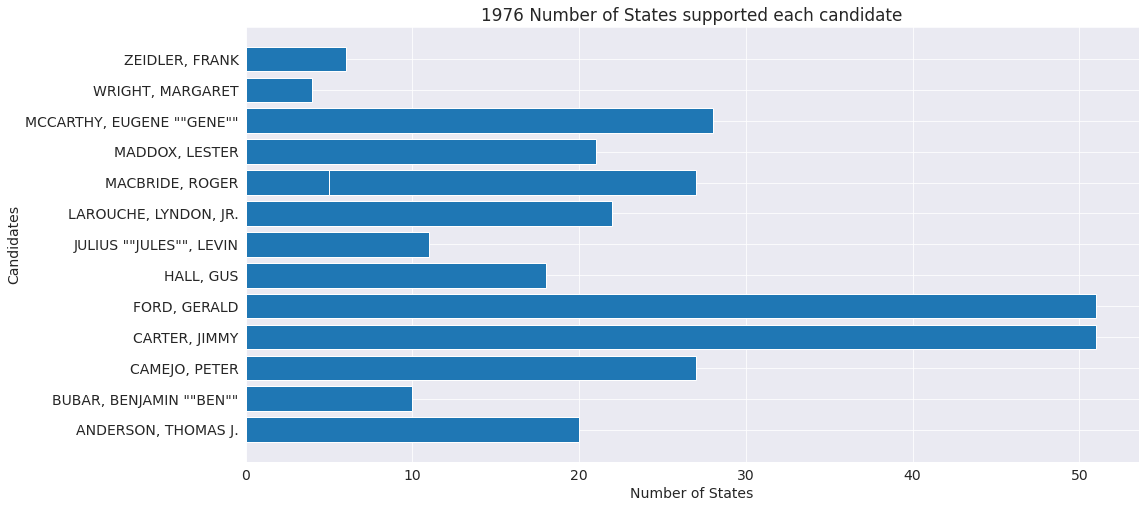

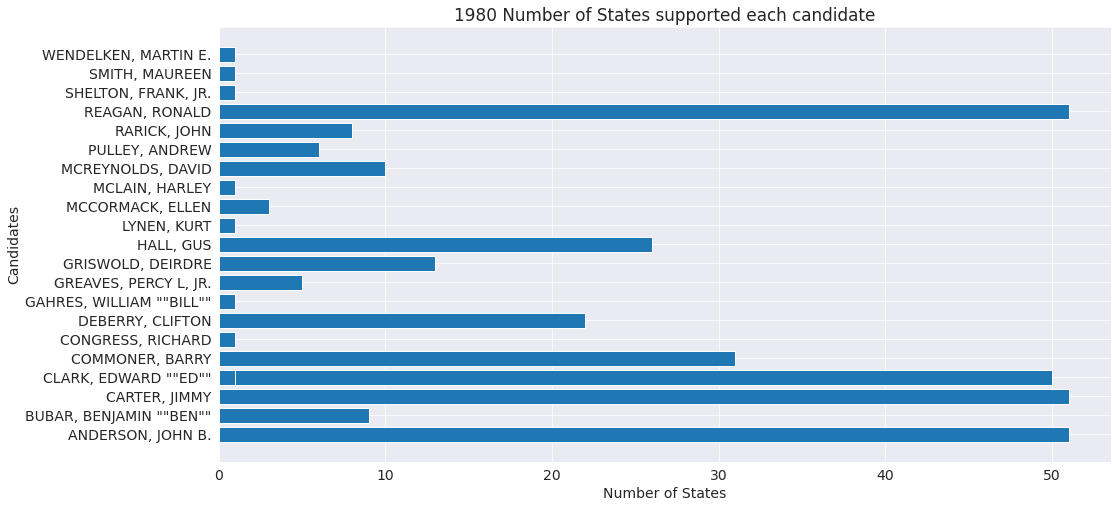

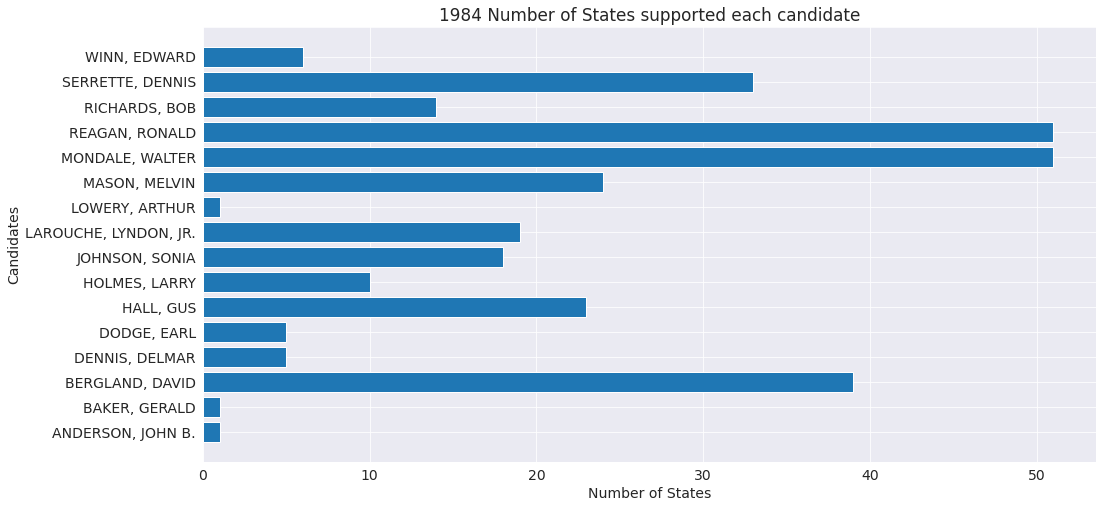

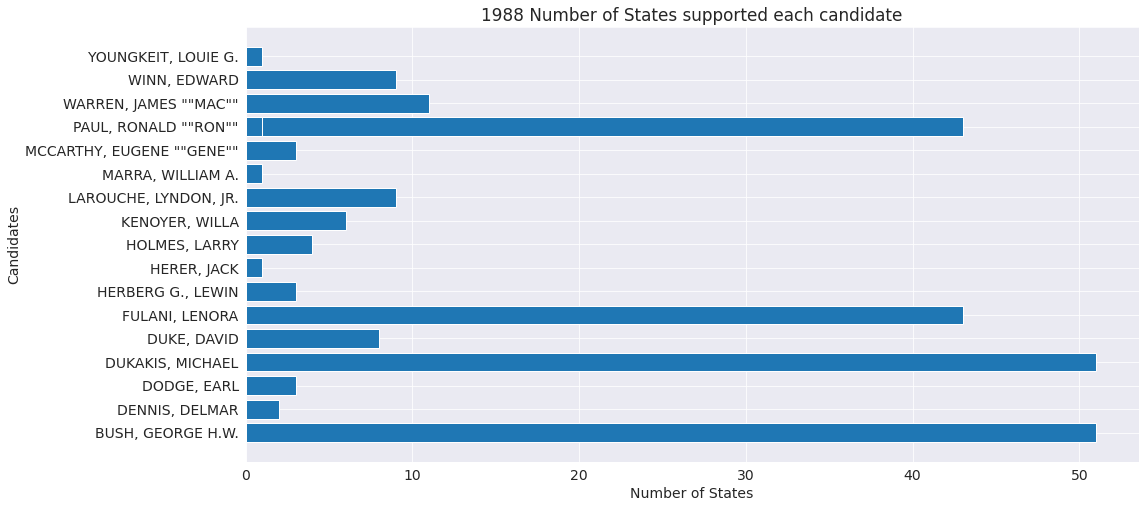

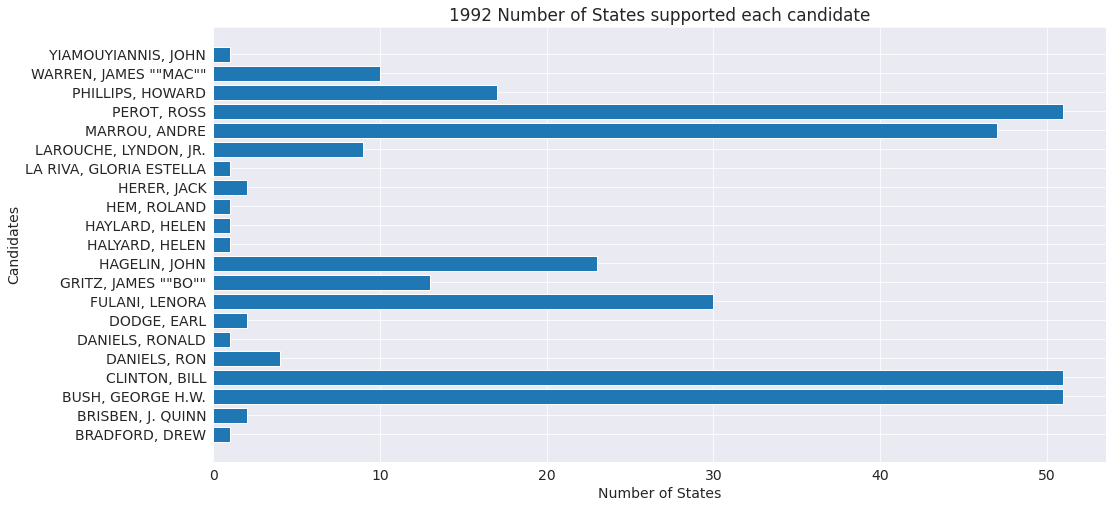

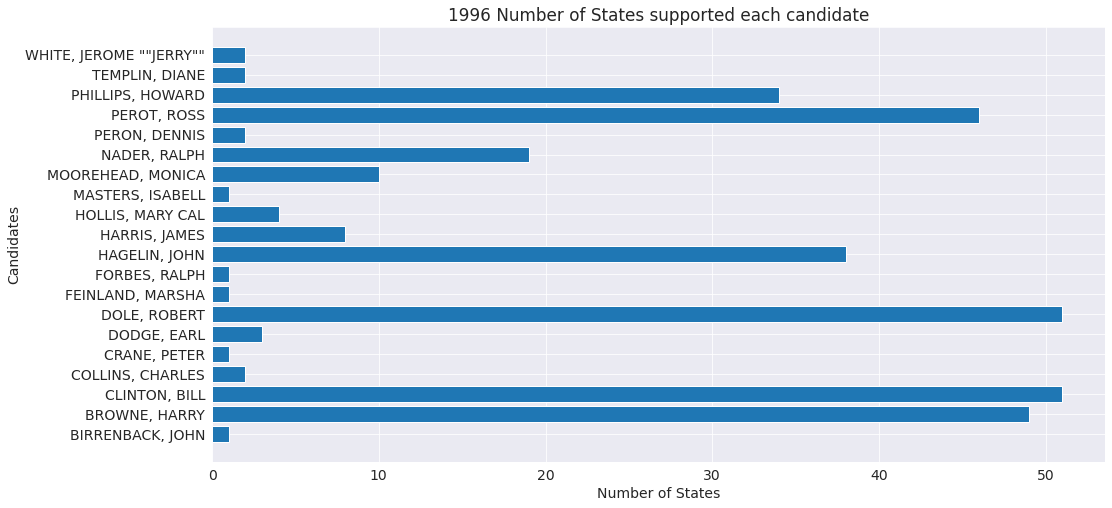

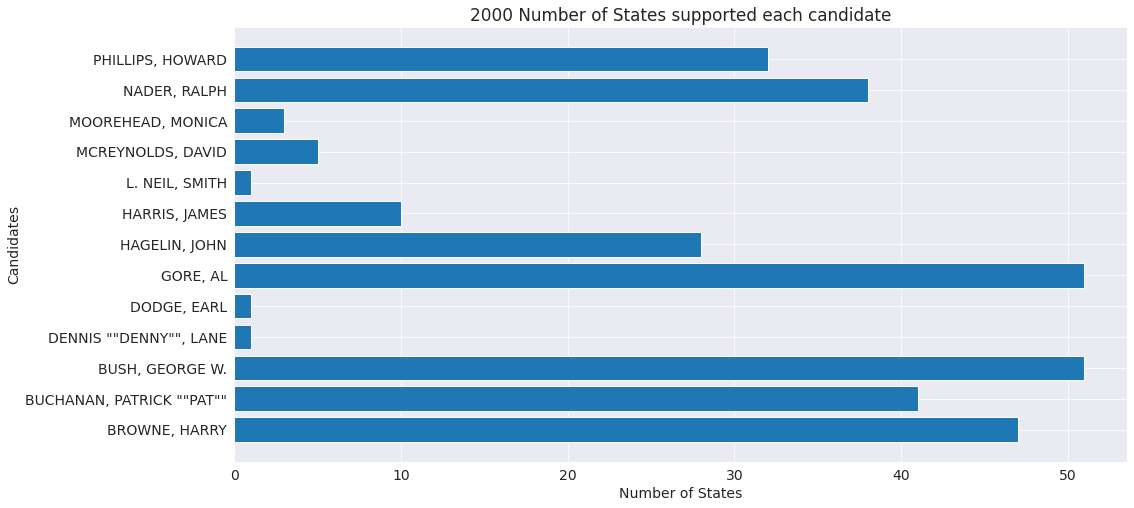

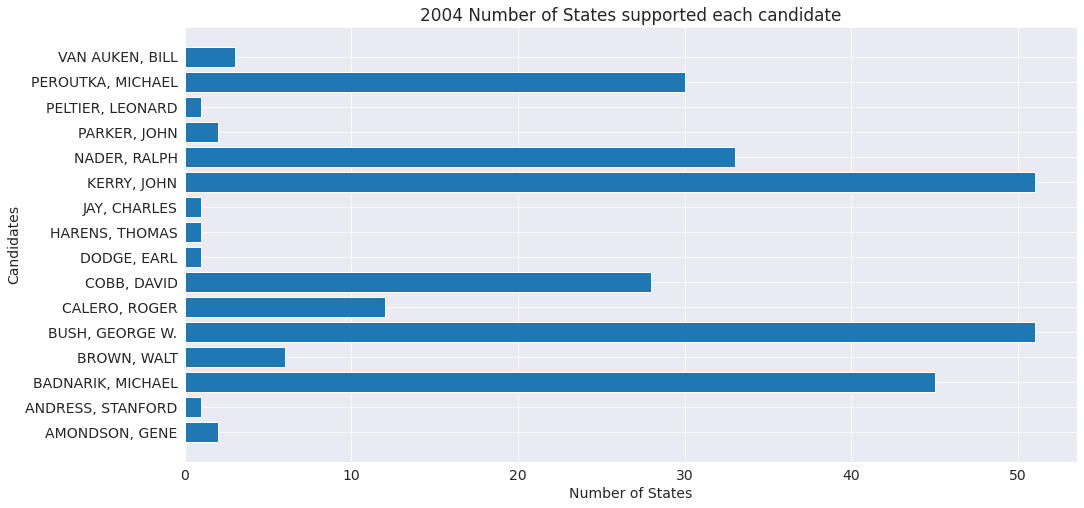

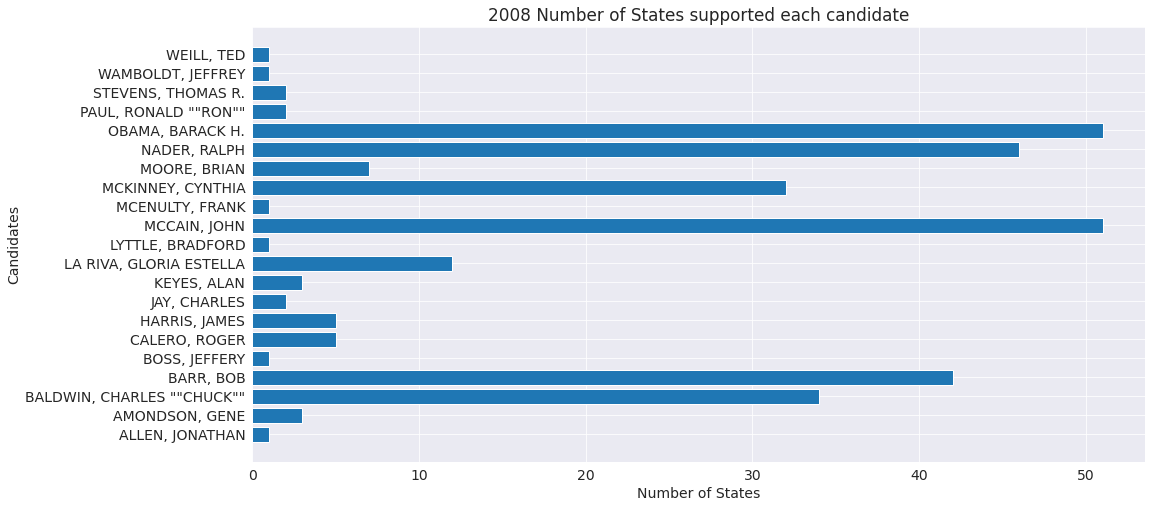

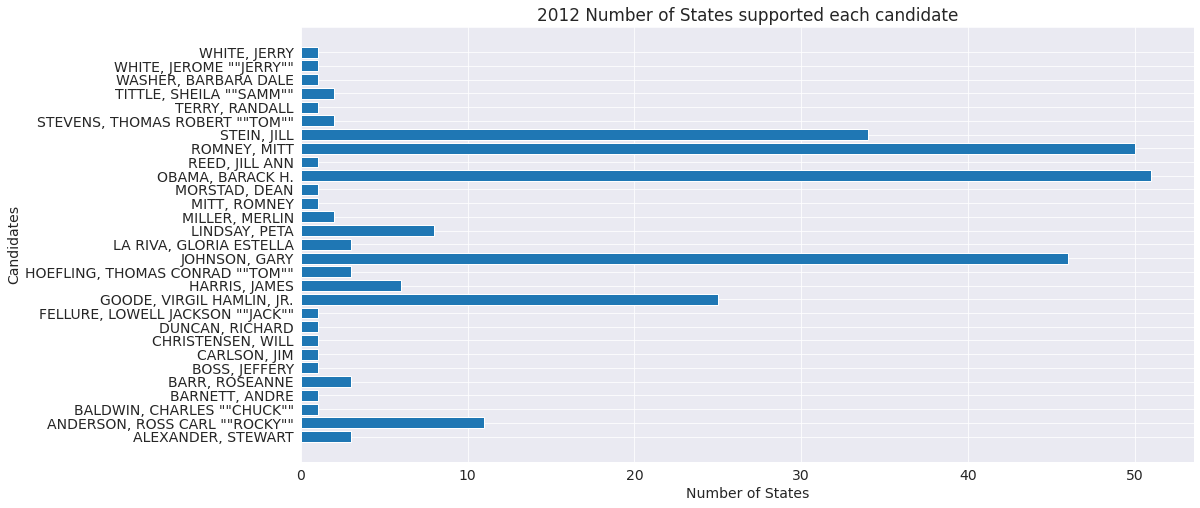

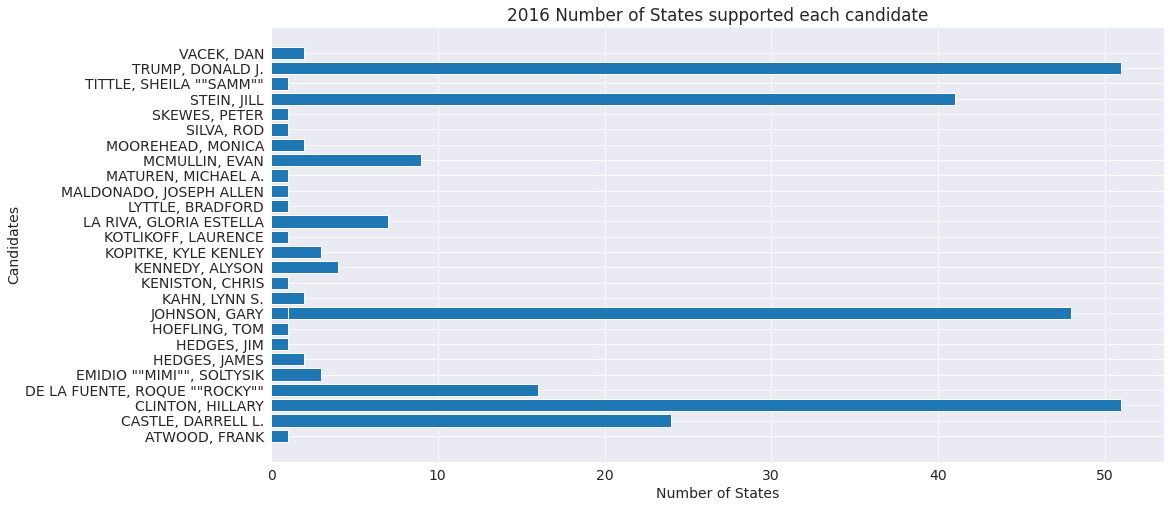

In [54]:
for year in np.arange(1976,2020,4):
    plt.figure(figsize=(16,8))
    plt.title('{} Number of States supported each candidate'.format(year))
    plt.xlabel('Number of States')
    plt.ylabel('Candidates')
    plt.barh(y = states_supporting_candidates.loc[states_supporting_candidates.year == year, 'candidate'],
            width = states_supporting_candidates.loc[states_supporting_candidates.year == year, 'state'],
            align = 'center')
    

#### Above is graphical representaton of previous table.

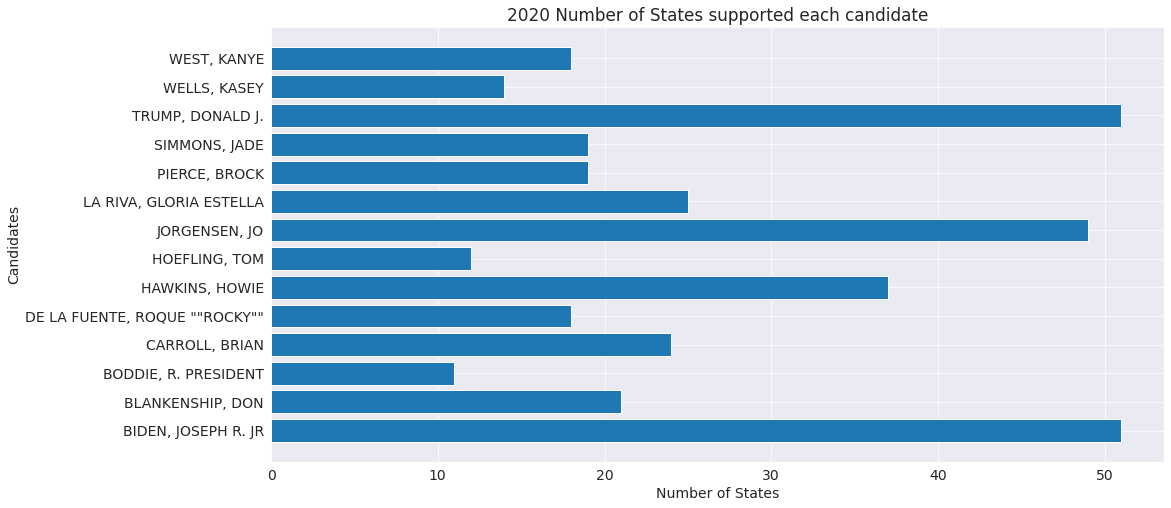

In [55]:
plt.figure(figsize=(16,8))
plt.title('2020 Number of States supported each candidate')
plt.xlabel('Number of States')
plt.ylabel('Candidates')
plt.barh(y = states_supporting_candidates.loc[(states_supporting_candidates.year == 2020)&(states_supporting_candidates.state > 10), 'candidate'],
        width = states_supporting_candidates.loc[(states_supporting_candidates.year == 2020)&(states_supporting_candidates.state > 10), 'state'],
        align = 'center');

#### Since 2020 election had too many candidates, graph looked a bit mess, so I decided to ignore the candidates who got support from at most 10 states.

In [56]:
states_count = len(merged_president_df.state.unique())
full_support = states_supporting_candidates[states_supporting_candidates.state == states_count]

In [57]:
full_support

,year,candidate,party_simplified,state
3,1976,"CARTER, JIMMY",DEMOCRAT,51
4,1976,"FORD, GERALD",REPUBLICAN,51
14,1980,"ANDERSON, JOHN B.",OTHER,51
16,1980,"CARTER, JIMMY",DEMOCRAT,51
32,1980,"REAGAN, RONALD",REPUBLICAN,51
47,1984,"MONDALE, WALTER",DEMOCRAT,51
48,1984,"REAGAN, RONALD",REPUBLICAN,51
52,1988,"BUSH, GEORGE H.W.",REPUBLICAN,51
55,1988,"DUKAKIS, MICHAEL",DEMOCRAT,51
72,1992,"BUSH, GEORGE H.W.",REPUBLICAN,51


#### Above are the candidates who got full support from all states during election between 1976-2020

In [58]:
full_support.groupby('year')['candidate'].count()

year
1976    2
1980    3
1984    2
1988    2
1992    3
1996    2
2000    2
2004    2
2008    2
2012    1
2016    2
2020    2
Name: candidate, dtype: int64

#### It looks like mostly only 2 candidates get full support from all States, but there were cases when at the same time 3 candidates at 1980 and 1992 got full support, and only 1 candidate at 2012, and his name was Barack Obama.

# Who has participated in Presidential Election more than anyone between 1976-2020?

In [59]:
frequent_candidate = states_supporting_candidates.copy()
frequent_candidate = frequent_candidate.groupby(['candidate'], as_index=False)['year'].count()
frequent_candidate[frequent_candidate.year == frequent_candidate.year.max()]
states_supporting_candidates[states_supporting_candidates.candidate=='DODGE, EARL']

,year,candidate,party_simplified,state
40,1984,"DODGE, EARL",OTHER,5
54,1988,"DODGE, EARL",OTHER,3
76,1992,"DODGE, EARL",OTHER,2
96,1996,"DODGE, EARL",OTHER,3
115,2000,"DODGE, EARL",OTHER,1
131,2004,"DODGE, EARL",OTHER,1


#### Interesting fact: Earl Dodge was the only candidate who proposed his candidate 6 times starting from 1984 to 2004. Unfortunately, each election year, the number of supporter States declined gradually.

# Who got the lowest number of votes since 1976 Presidential Election?

In [60]:
merged_president_df[merged_president_df.candidatevotes==merged_president_df.candidatevotes.min()]

,year,state,state_fips,candidate,writein,candidatevotes,totalvotes,party_simplified
3368,2020,CONNECTICUT,9,"KLOJZY, JEFFREY J.",True,0,1823857,OTHER


#### Well, it seems like Jeffrey J. Klojzy is the only candidate who got 0 votes and participated in election since 1976. He was a write-in candidate, so maybe someone made a joke.

In [61]:
merged_president_df.drop(index=3368, inplace=True)

#### Let's drop the candidate from the dataset who got 0 votes

# From which State exactly each candidate got the highest number of votes with highest share?

In [62]:
candidate_state = merged_president_df.groupby(['year','candidate'], as_index=False).apply(lambda x: x.loc[x['candidatevotes'].idxmax(),['state','candidatevotes']])
candidate_state

,year,candidate,state,candidatevotes
0,1976,"ANDERSON, THOMAS J.",FLORIDA,21325
1,1976,"BUBAR, BENJAMIN """"BEN""""",ALABAMA,6669
2,1976,"CAMEJO, PETER",VIRGINIA,17802
3,1976,"CARTER, JIMMY",CALIFORNIA,3742284
4,1976,"FORD, GERALD",CALIFORNIA,3882244
...,...,...,...,...
305,2020,"WELLS, KASEY",TEXAS,114
306,2020,"WEST, KANYE",TENNESSEE,10279
307,2020,"WILLIAMS JR., ANDY",ILLINOIS,8
308,2020,"WILLIAMS, MITCHELL",INDIANA,4


#### The resulting output is a DataFrame with columns 'year', 'candidate', 'state', and 'candidatevotes', where each row corresponds to the state where the candidate received the maximum number of votes out of all votes he/she got so far.

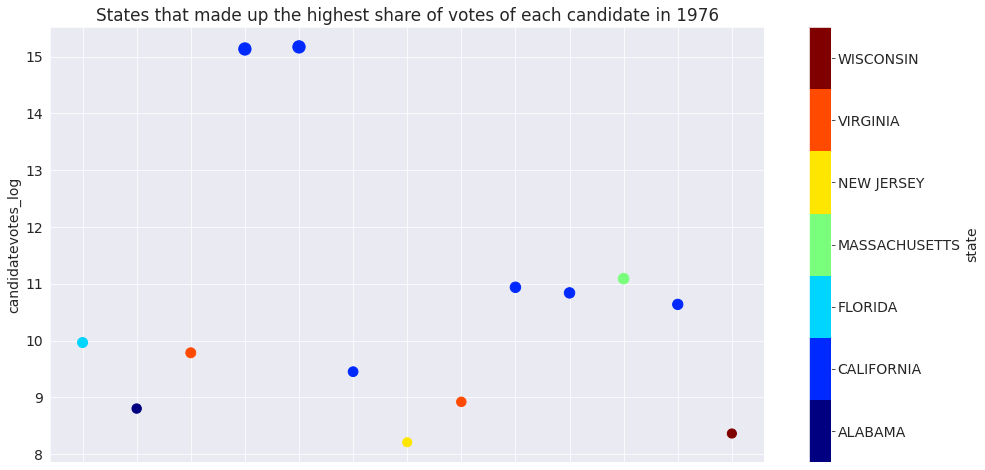

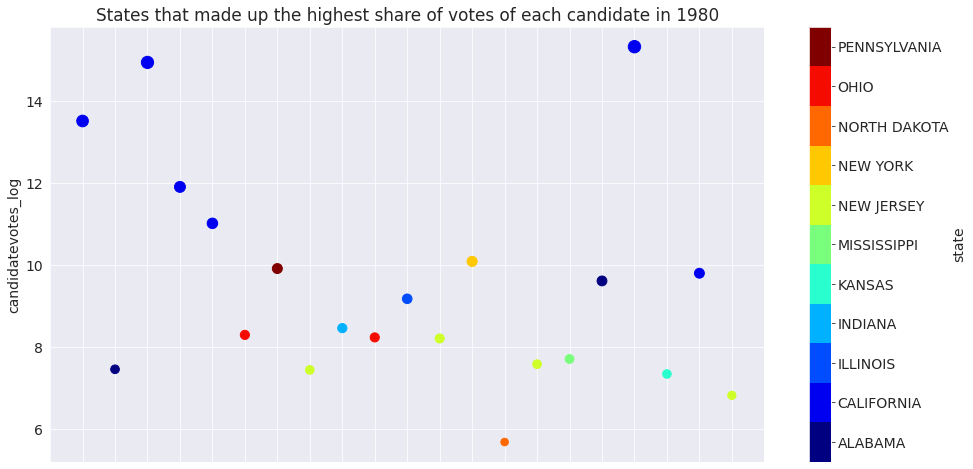

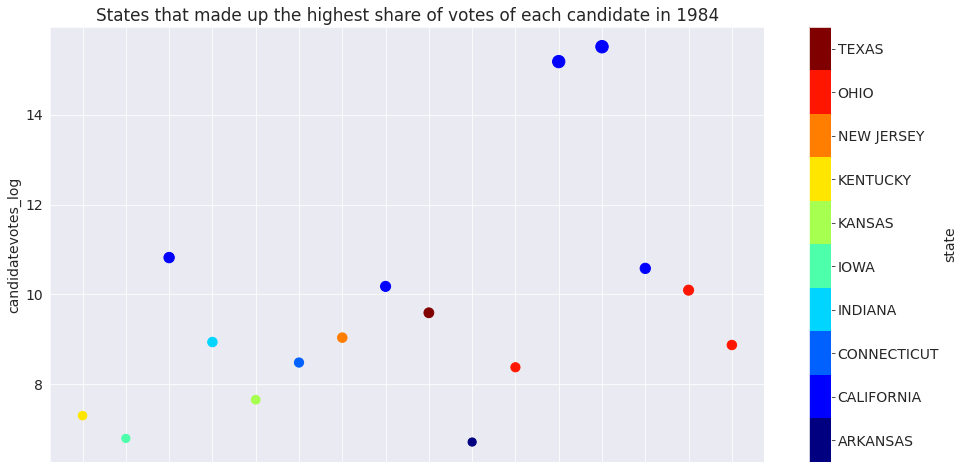

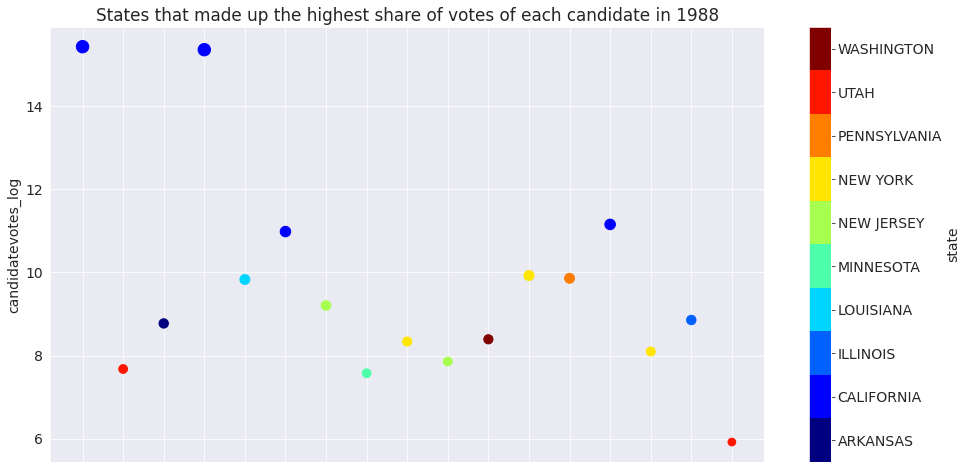

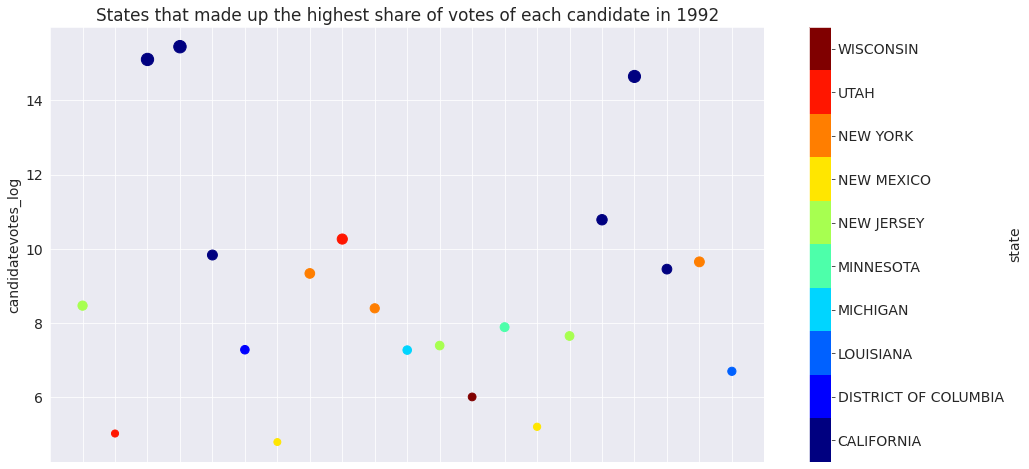

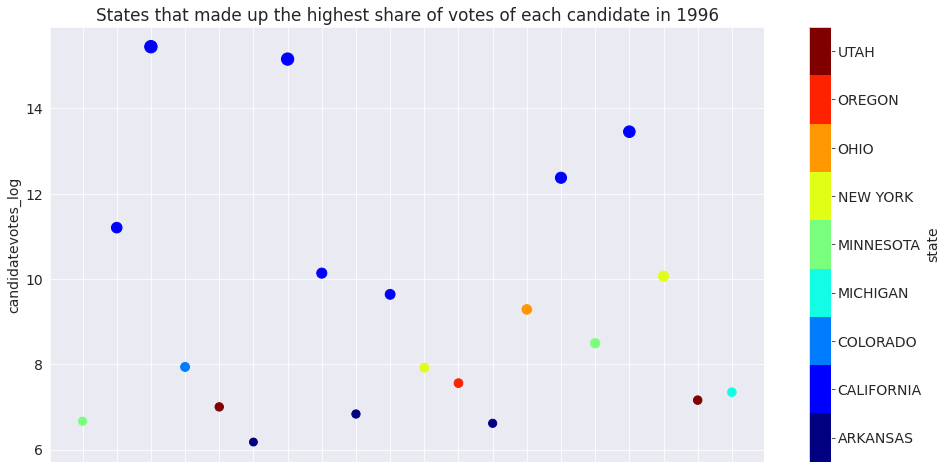

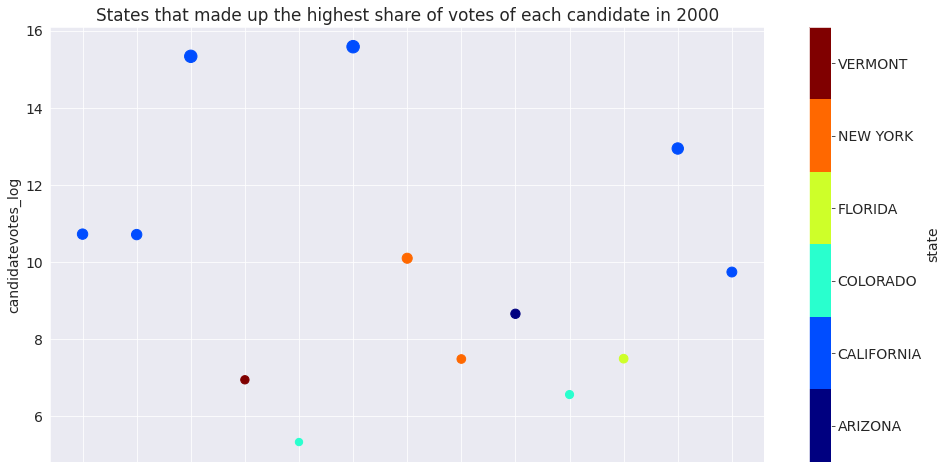

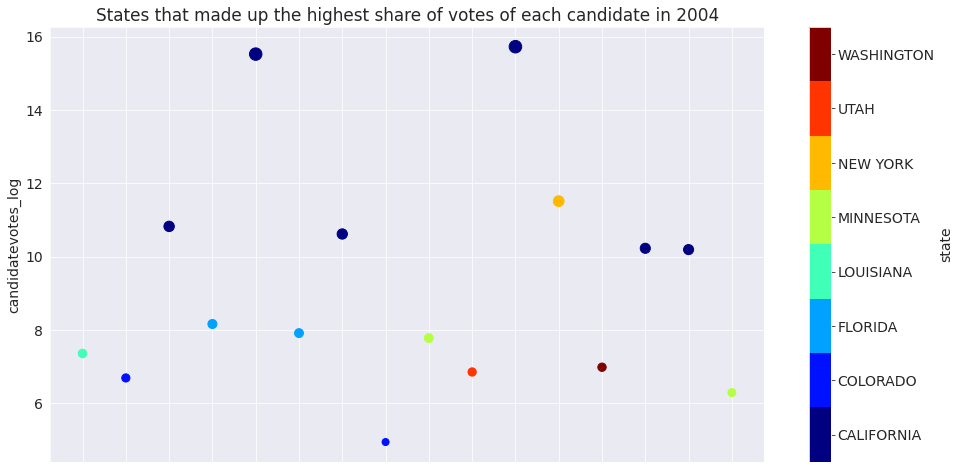

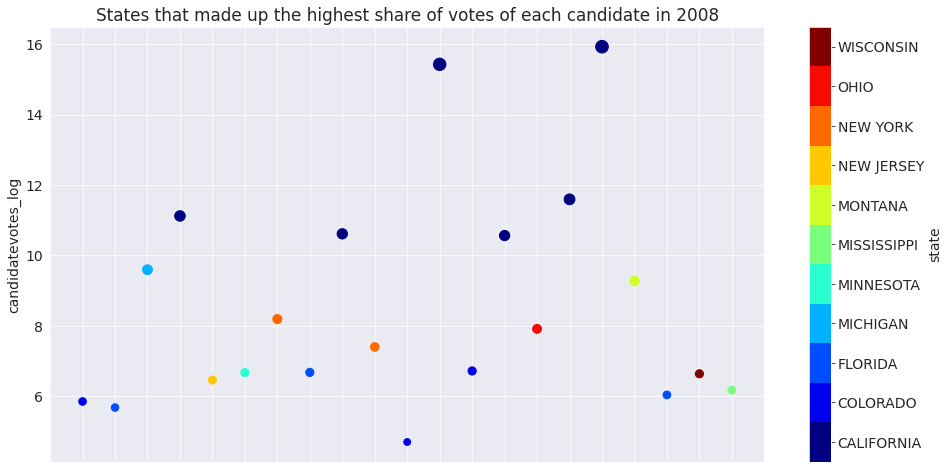

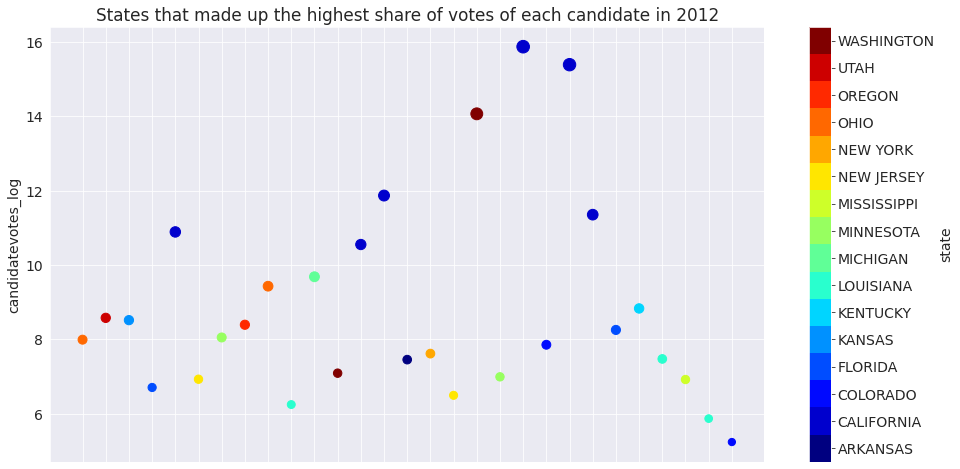

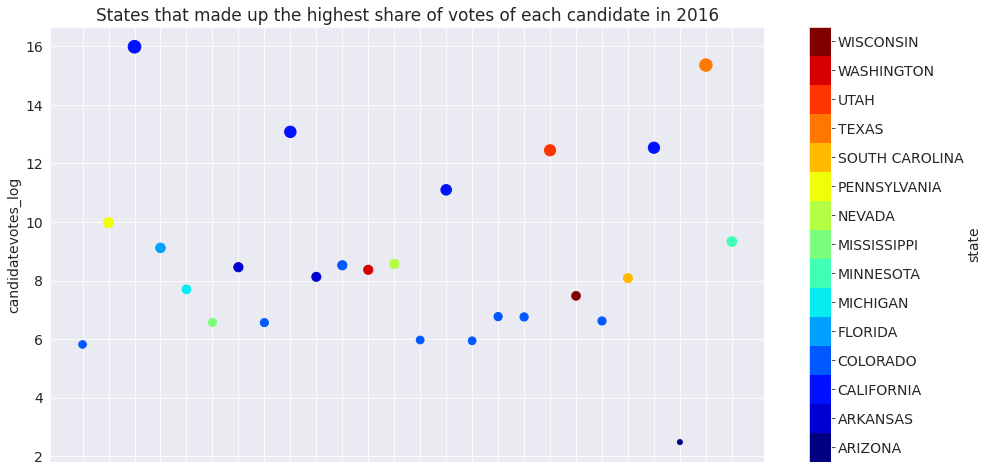

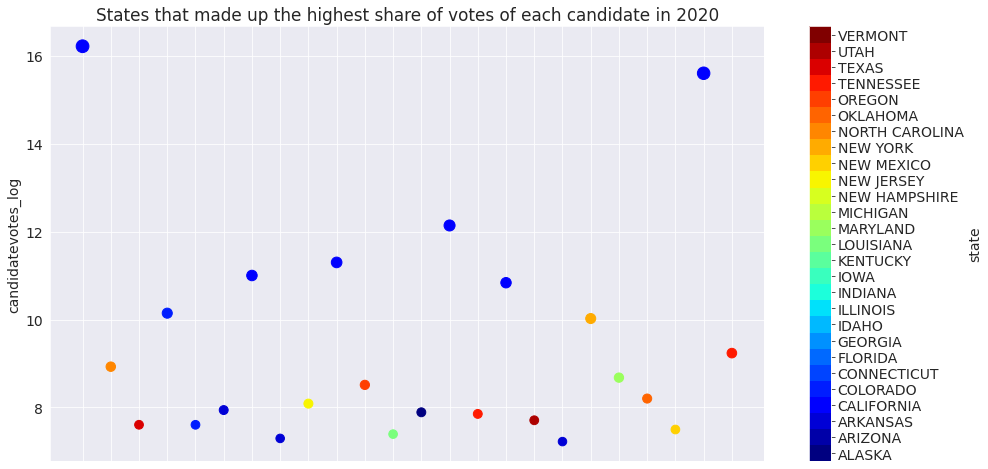

In [63]:
for year in np.arange(1976,2024,4):
    
    candidate_state_year = candidate_state[candidate_state.year==year]
    candidate_state_year = candidate_state_year.assign(candidatevotes_log=pd.DataFrame(candidate_state_year['candidatevotes'].apply(lambda x: m.log(x))))
    candidate_state_year = candidate_state_year.assign(state=pd.Categorical(candidate_state_year['state']))

    if year == 2020:
        candidate_state_year = candidate_state_year[candidate_state_year.candidatevotes > candidate_state_year.candidatevotes.quantile(0.75)]
   
    candidate_state_year.plot.scatter(x='candidate',
                                      y='candidatevotes_log',
                                      c='state',
                                      s=candidate_state_year['candidatevotes_log']*10,
                                      cmap='jet',
                                      title='States that made up the highest share of votes of each candidate in {}'.format(year),
                                      figsize=(16,8))
    plt.xticks(rotation = 90, fontsize=10)
    

#### Above we've illustrated some graphs that illustrate States that made up the highest share of votes of each candidate between 1976 and 2020. I've dropped some insignificant candidates from 2020 who got less than 75% quantile of candidate votes to make the graph more understandable.  

#### From all the graphs it can be clearly seen that at each year citizens of California made up the highest number of votes among all other states. Most importantly, exactly the main candidates who were dividing the race between each other were supported by California State and this state made up the highest share of their votes. It means, to increase the probability of being elected as a President of USA, candidates had to gain the full support of Callifornia, as it was the main driven factor. 

# Lets identify how many candidates participated in election at each election year starting from 1976?

In [64]:
merged_president_df.sort_values(by=['year','state'], inplace=True)

In [65]:
number_of_candidates = merged_president_df.groupby(['year'], as_index=False)['candidate'].nunique()

In [66]:
number_of_candidates

,year,candidate
0,1976,13
1,1980,21
2,1984,16
3,1988,17
4,1992,21
5,1996,20
6,2000,13
7,2004,16
8,2008,21
9,2012,29


#### Above table shows how many candidates participated at each election year between 1976-2020

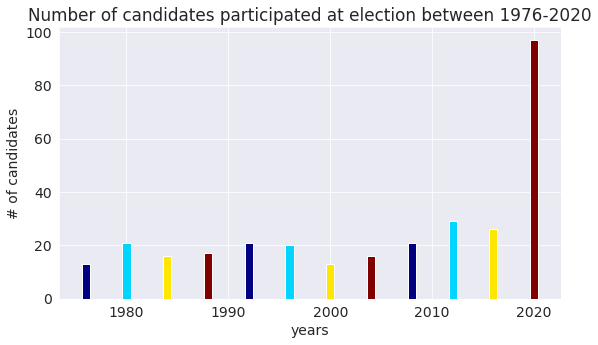

In [67]:
cmap = plt.get_cmap('jet')

plt.bar(data=number_of_candidates,
        x='year',
        height='candidate', 
        align='center',
        color=cmap(np.linspace(0,1,len('year')))
        )
plt.title('Number of candidates participated at election between 1976-2020')
plt.xlabel('years')
plt.ylabel('# of candidates');

In [68]:
number_of_candidates.iloc[:-1,1].mean()

19.363636363636363

In [69]:
number_of_candidates.iloc[:,1].mean()

25.833333333333332

#### Above is the visual presentation that shows how many candidates participated during election at each year. Obviously, the number of candidates at 2020 is abnormally very high, namely 97 candidates. Before 2020, the average number of candidates participated at election was almost 20 but then after 2020, it raised to almost 26 candidates in average. There should be a reason why so many candidates were active at 2020 election. So why?

# Lets find how many of these candidates were write-in and not write-in

In [70]:
writein_df = merged_president_df.drop_duplicates(subset=['year','candidate'])


In [71]:
writein_df = writein_df.groupby(['year', 'writein']).size().reset_index(name='count')

In [72]:
writein_df

,year,writein,count
0,1976,False,13
1,1980,False,21
2,1984,False,16
3,1988,False,17
4,1992,False,21
5,1996,False,20
6,2000,False,13
7,2004,False,16
8,2008,False,21
9,2012,False,29


In [73]:
writein_df = writein_df.groupby(['year', 'writein'])['count'].sum().unstack(fill_value=0)

#### First we create a dataframe with number of write-in and not write-in candidates

In [74]:
writein_df

writein,False,True
year,,
1976,13,0
1980,21,0
1984,16,0
1988,17,0
1992,21,0
1996,20,0
2000,13,0
2004,16,0
2008,21,0


#### Above table shows number of write-in and not write-in candidates at each year

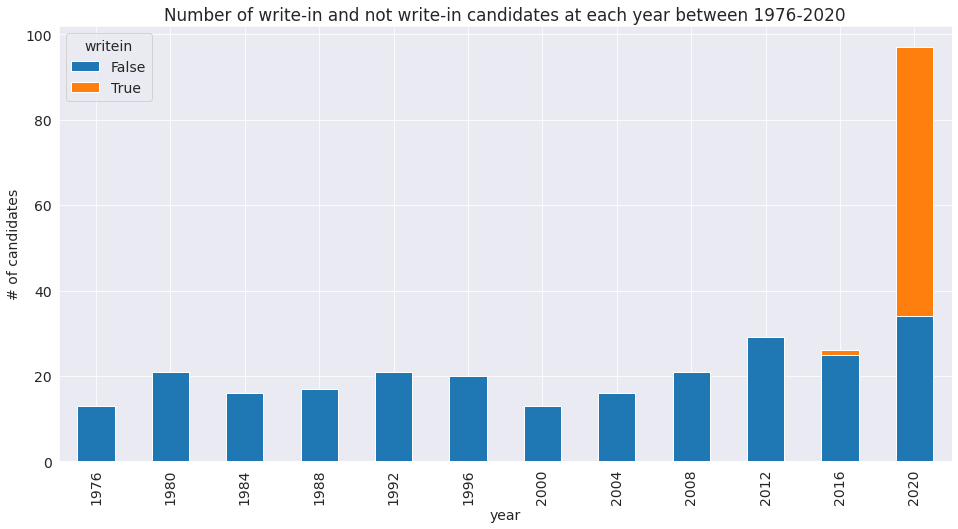

In [75]:
writein_df.plot.bar(figsize=(16,8), stacked=True)
plt.title('Number of write-in and not write-in candidates at each year between 1976-2020')
plt.ylabel('# of candidates');

#### Above is the visual representation. Starting from 1976 to 2016 the number of write-in candidates were at most 1, but at 2020 the number of write-in cadidates for the first time was much higher than not write-in candidates, namely 63 write-in candidates and 34 not write-in candidates. Again why so many write-in candidates?

# What was the average number of votes given by each state at each Presidential Election year?

In [76]:
average_by_year_state_df = merged_president_df.groupby(['year','state'])[['candidatevotes','totalvotes']].mean().reset_index()

In [77]:
average_by_year_state_df

,year,state,candidatevotes,totalvotes
0,1976,ALABAMA,1.970903e+05,1182542.0
1,1976,ALASKA,4.079933e+04,122398.0
2,1976,ARIZONA,1.060996e+05,742697.0
3,1976,ARKANSAS,2.556320e+05,766896.0
4,1976,CALIFORNIA,1.114824e+06,7803770.0
...,...,...,...,...
607,2020,VIRGINIA,1.480253e+06,4440759.0
608,2020,WASHINGTON,6.767298e+05,4060379.0
609,2020,WEST VIRGINIA,1.986630e+05,794652.0
610,2020,WISCONSIN,2.743062e+05,3291674.0


#### Above we've calculated the average number of candidate and total votes grouping the dataset by year and state.

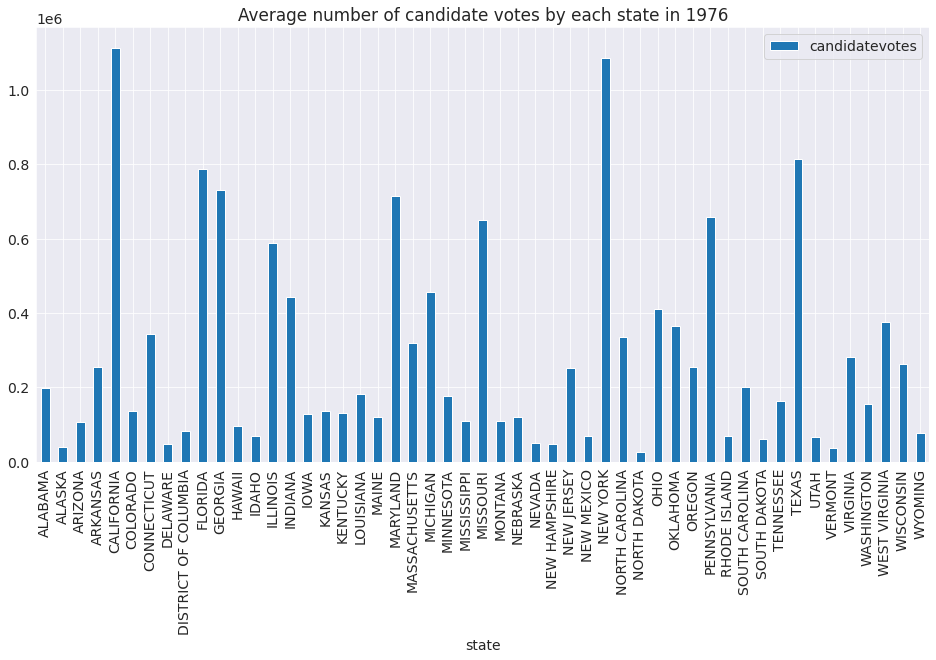

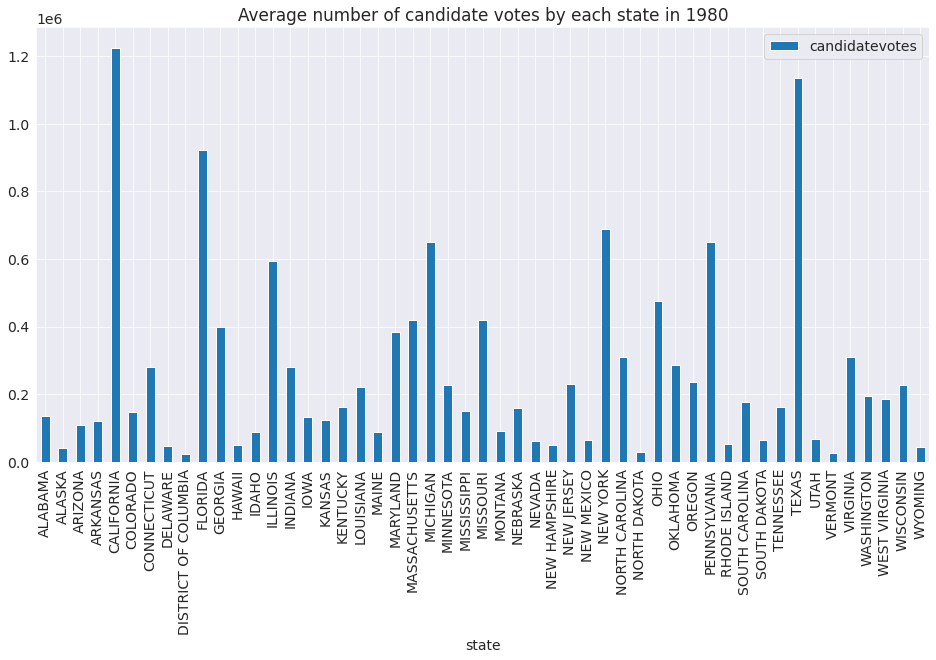

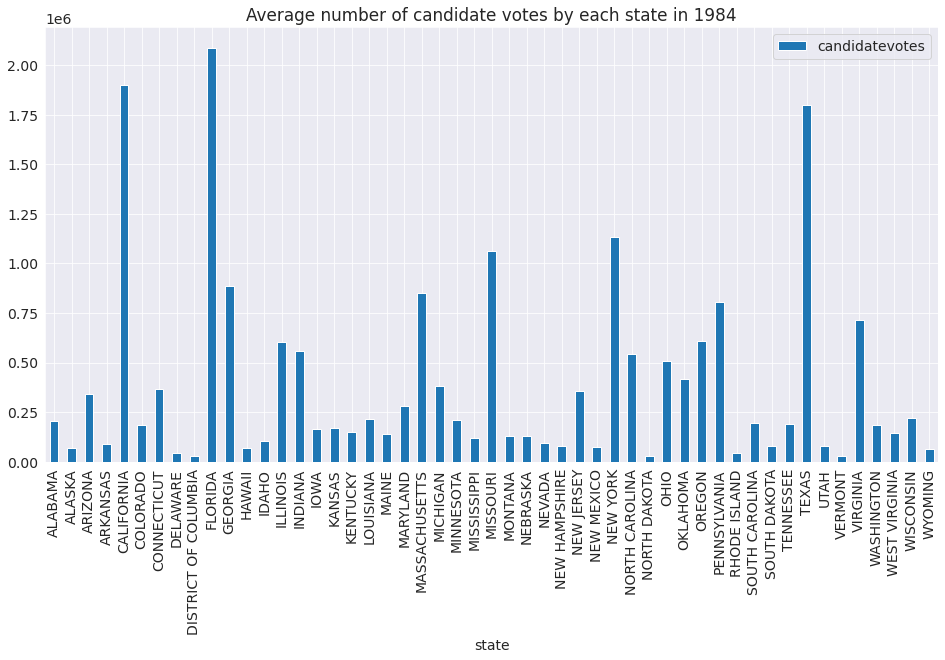

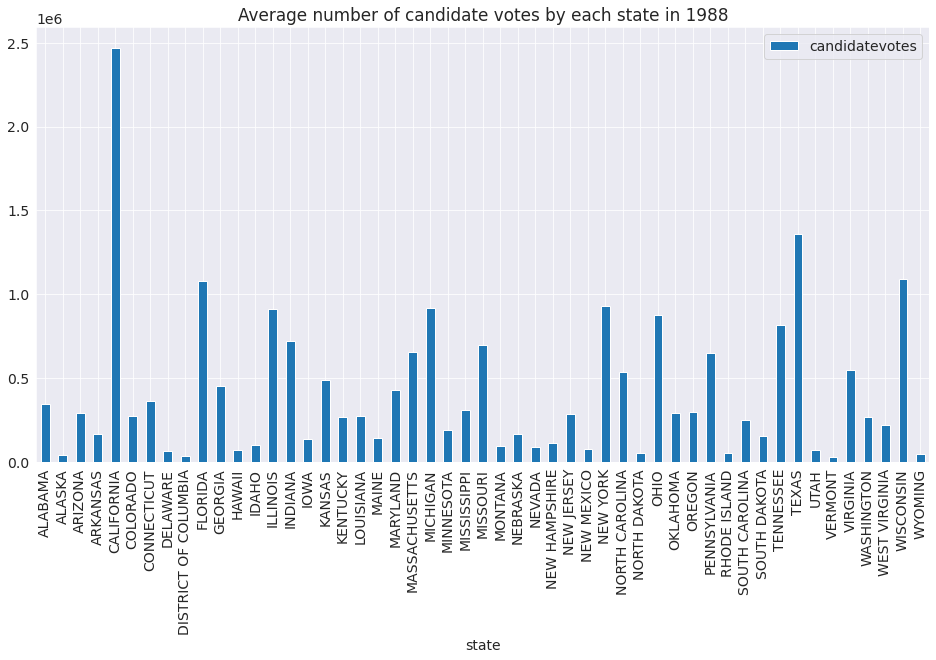

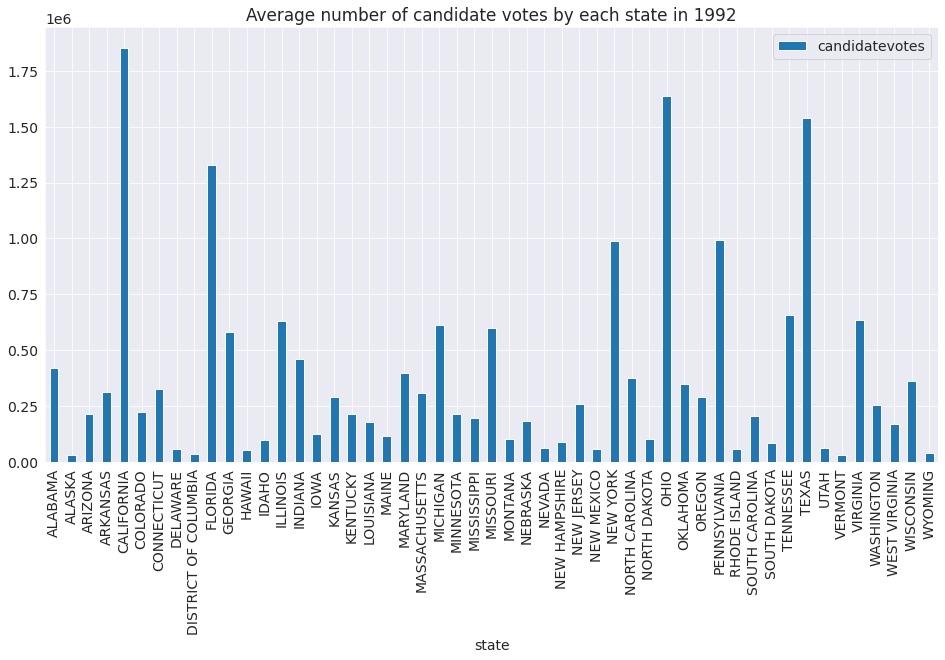

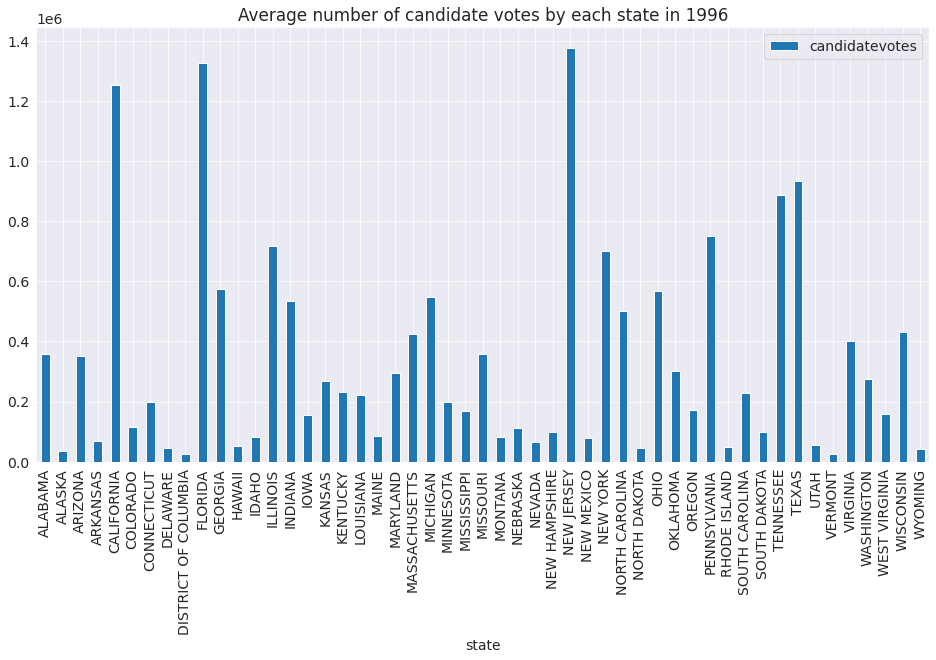

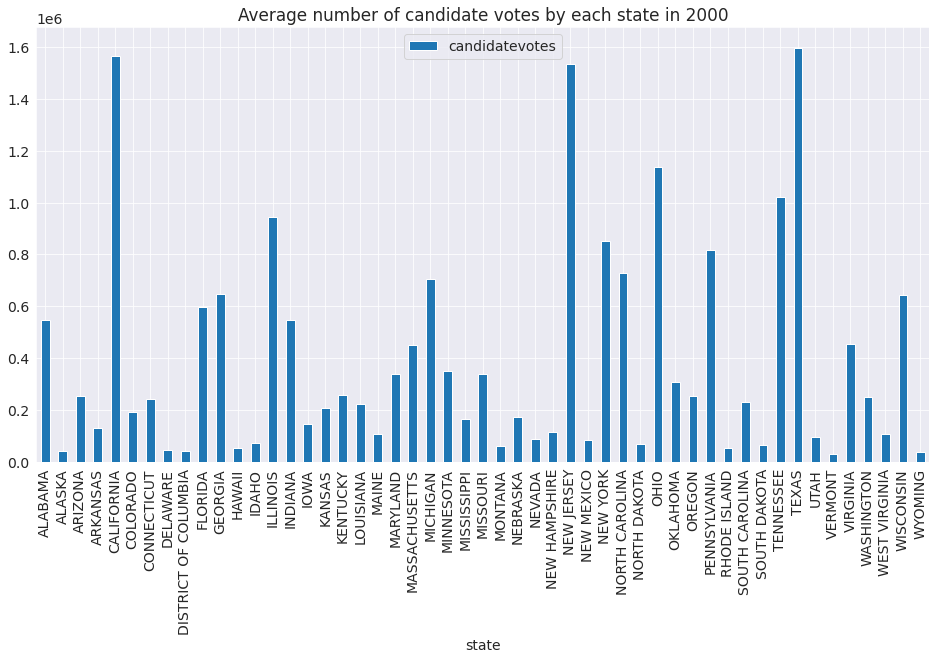

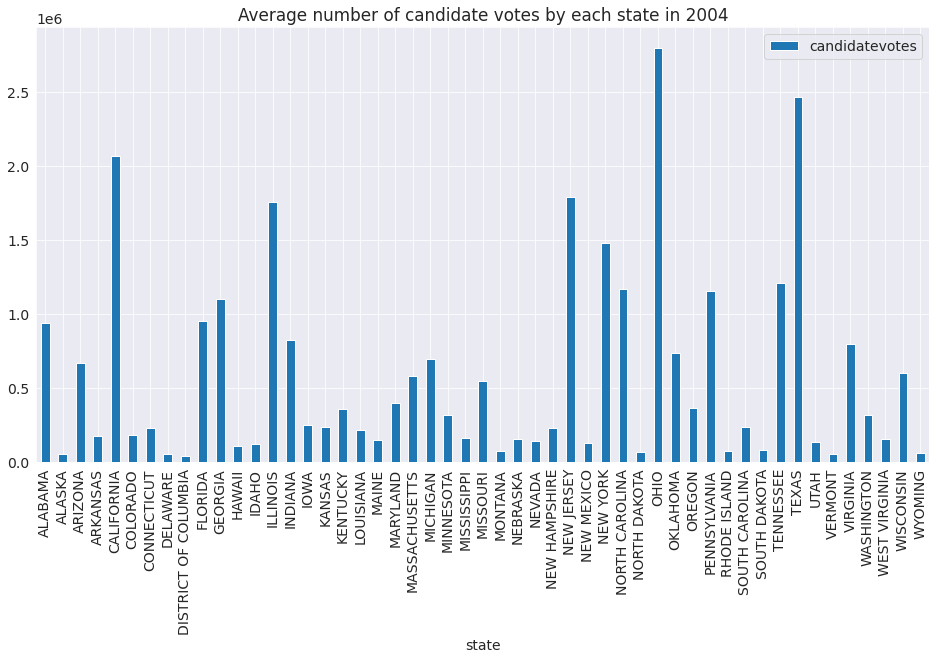

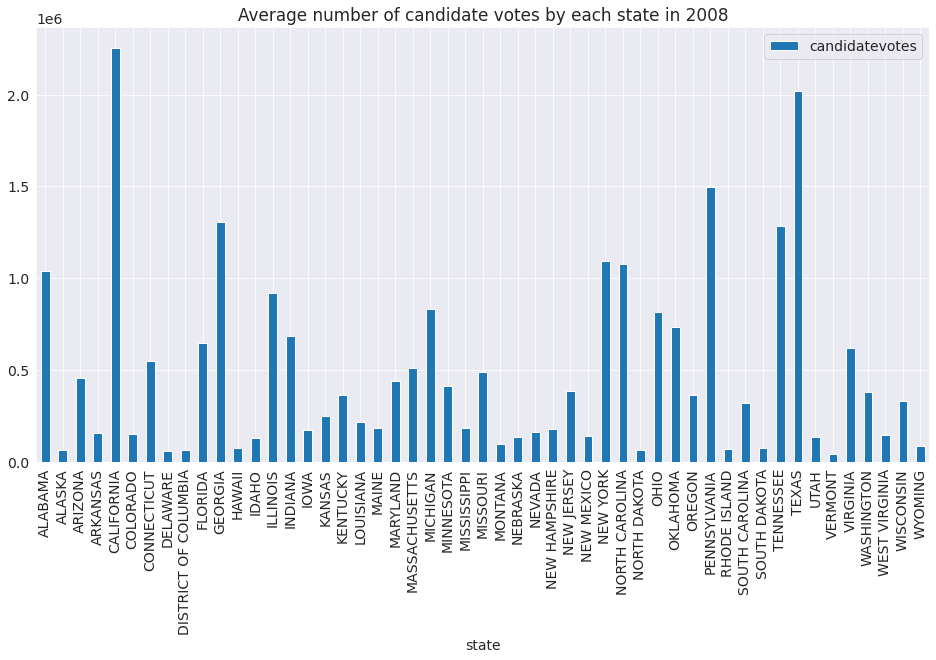

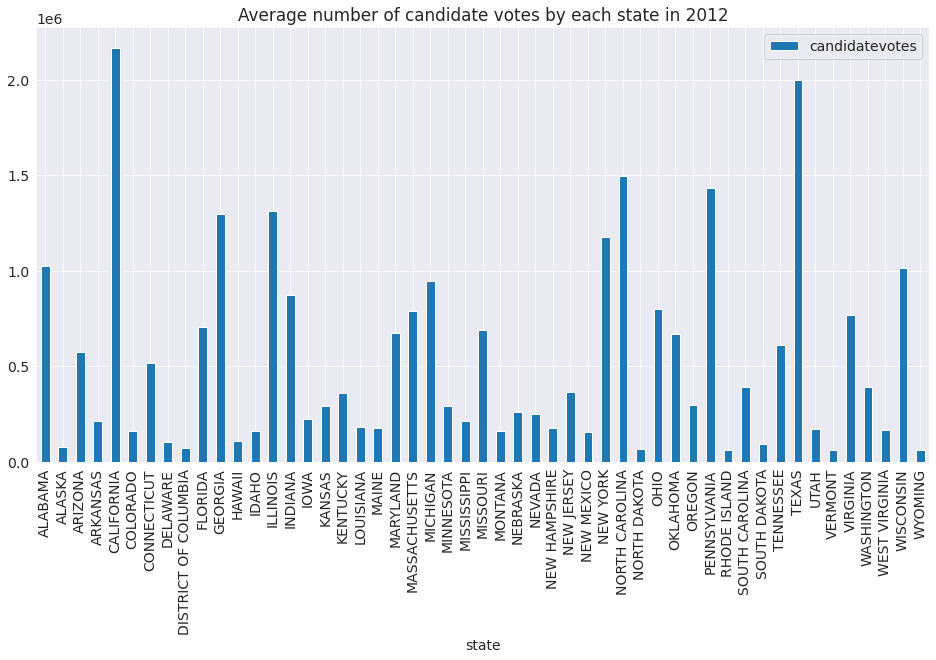

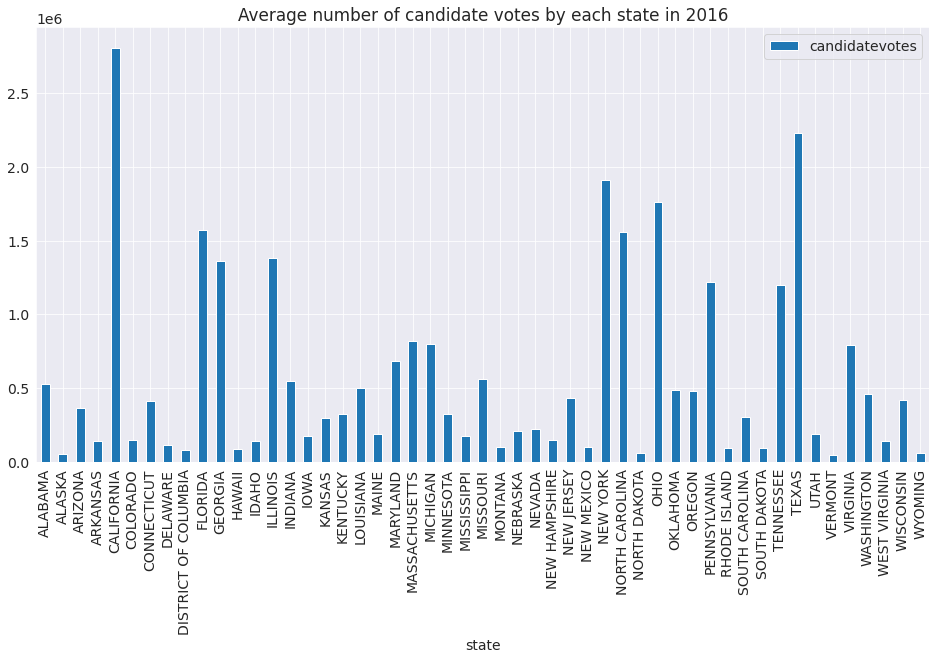

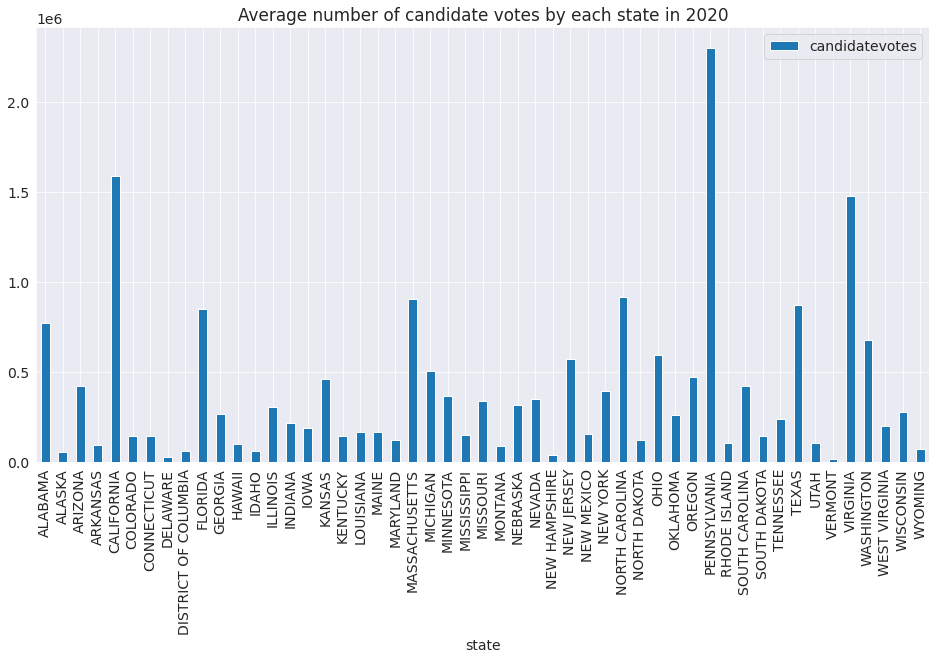

In [78]:
for year in np.arange(1976,2024,4):
    average_by_year_state_df.loc[average_by_year_state_df.year==year,['year','state','candidatevotes']].plot.bar(x='state',
                                                                                                                y='candidatevotes', 
                                                                                                                figsize=(16,8),
                                                                                                                title='Average number of candidate votes by each state in {}'.format(year))

#### Above is the illsutration of the average number of candidate votes counted by each State between 1976-2020

In [79]:
state_votes_max_avg = average_by_year_state_df.groupby('year', as_index=False).apply(lambda x: x.loc[x['candidatevotes'].idxmax(),['state','candidatevotes']])
state_votes_max_avg

,year,state,candidatevotes
0,1976,CALIFORNIA,1.114824e+06
1,1980,CALIFORNIA,1.226134e+06
2,1984,FLORIDA,2.089583e+06
3,1988,CALIFORNIA,2.471564e+06
4,1992,CALIFORNIA,1.854559e+06
5,1996,NEW JERSEY,1.377730e+06
6,2000,TEXAS,1.598635e+06
7,2004,OHIO,2.800464e+06
8,2008,CALIFORNIA,2.256944e+06
9,2012,CALIFORNIA,2.169216e+06


#### Above table shows what States had the highest-average number of votes made between 1976-2020. In other words, these States were top voters since 1976.

In [80]:
state_votes_max_avg = state_votes_max_avg.assign(state=pd.Categorical(state_votes_max_avg['state']))

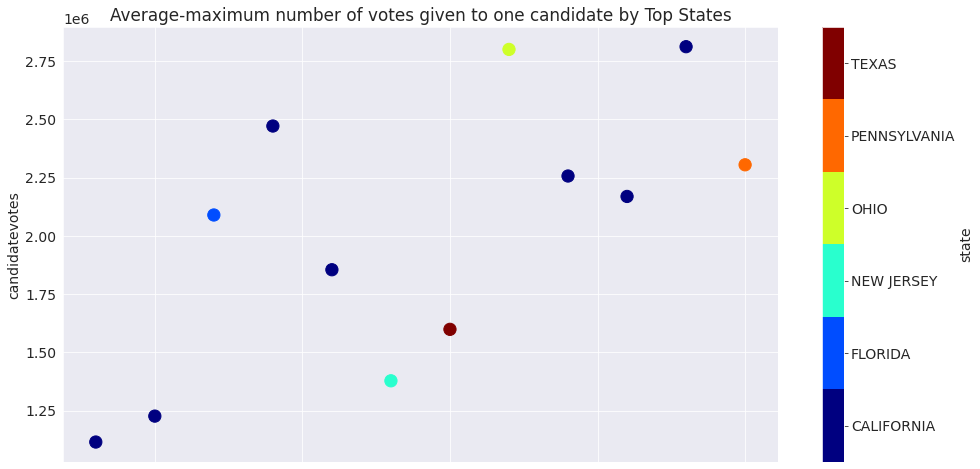

In [81]:
state_votes_max_avg.plot.scatter(x='year', 
                                y='candidatevotes', 
                                cmap='jet',
                                figsize=(16,8),
                                c='state',
                                s=150,
                                title='Average-maximum number of votes given to one candidate by Top States');

#### We can observe two interesting results: 1st - since 1976, the average number of votes made by each State to each candidate were increasing gradually, which might be explained by the population surge since 1976. 2nd - the topmost voter among all States was Callifornia i.e. Callifornia was one of the States that indeed could drove the direction of presidential election and the candidate who got its main support from this State had the highest chance of becoming the next President of USA.

In [82]:
average_by_year_state_df.groupby('year',as_index=False).apply(lambda x: x.loc[x['totalvotes'].idxmax(),['state','totalvotes']])

,year,state,totalvotes
0,1976,CALIFORNIA,7803770.0
1,1980,CALIFORNIA,8582938.0
2,1984,CALIFORNIA,9505041.0
3,1988,CALIFORNIA,9886254.0
4,1992,CALIFORNIA,11127352.0
5,1996,CALIFORNIA,10018616.0
6,2000,CALIFORNIA,10965822.0
7,2004,CALIFORNIA,12400499.0
8,2008,CALIFORNIA,13541664.0
9,2012,CALIFORNIA,13015298.0


#### By totalvotes, undoubtedly, Callifornia was the only State since 1976, that made up the highest share of votes among all other States.

In [83]:
state_votes_min_avg = average_by_year_state_df.groupby('year', as_index=False).apply(lambda x: x.loc[x['candidatevotes'].idxmin(),['state','candidatevotes']])
state_votes_min_avg

,year,state,candidatevotes
0,1976,NORTH DAKOTA,27028.000000
1,1980,DISTRICT OF COLUMBIA,21649.875000
2,1984,DISTRICT OF COLUMBIA,26309.875000
3,1988,VERMONT,26910.444444
4,1992,ALASKA,28682.333333
5,1996,VERMONT,25788.900000
6,2000,VERMONT,29379.400000
7,2004,DISTRICT OF COLUMBIA,37846.666667
8,2008,VERMONT,40447.750000
9,2012,VERMONT,59449.400000


In [84]:
state_votes_min_avg = state_votes_min_avg.assign(state = pd.Categorical(state_votes_min_avg['state']))

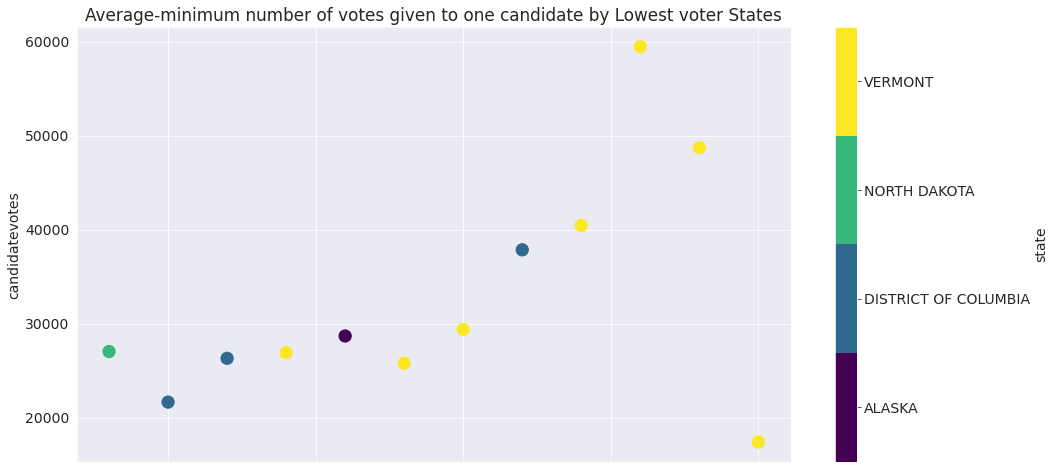

In [85]:
state_votes_min_avg.plot.scatter(x='year',
                                 y='candidatevotes',
                                 s=150,
                                 c='state',
                                 cmap='viridis',
                                 figsize=(16,8),
                                 title='Average-minimum number of votes given to one candidate by Lowest voter States');

#### As in the case of Callifornia as the topmost voter State, it seems Vermont is the lowest voter State, and since 1976, the number of votes made by least voter States were also increasing. However, in 2020, Vermont State gave out the least number of votes to a candidate since 1976, which can be explained by not being interested in election of 2020 by its State's citizens.  

# Who were the leading candidates with the highest number of votes earned at each year?

In [86]:
presidents_by_states_df = merged_president_df[['year','state','candidate','candidatevotes','party_simplified']]

In [87]:
presidents_by_states_df.loc[presidents_by_states_df['candidate'] == 'BUSH, GEORGE H.W.', 'candidate'] = 'BUSH, GEORGE W.'

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [88]:
presidents_by_states_dff = presidents_by_states_df.groupby(['year','state'], as_index=False).apply(lambda x: x.loc[x['candidatevotes'].idxmax(),['candidate','candidatevotes']])

In [89]:
presidents_by_states_dff

,year,state,candidate,candidatevotes
0,1976,ALABAMA,"CARTER, JIMMY",659170
1,1976,ALASKA,"FORD, GERALD",71555
2,1976,ARIZONA,"FORD, GERALD",418642
3,1976,ARKANSAS,"CARTER, JIMMY",498604
4,1976,CALIFORNIA,"FORD, GERALD",3882244
...,...,...,...,...
607,2020,VIRGINIA,"BIDEN, JOSEPH R. JR",2413568
608,2020,WASHINGTON,"BIDEN, JOSEPH R. JR",2369612
609,2020,WEST VIRGINIA,"TRUMP, DONALD J.",545382
610,2020,WISCONSIN,"BIDEN, JOSEPH R. JR",1630866


In [90]:
presidents_by_votes_df = presidents_by_states_dff.groupby(['year','candidate'], as_index=False)['candidatevotes'].sum()
presidents_by_votes_df

,year,candidate,candidatevotes
0,1976,"CARTER, JIMMY",23815458
1,1976,"FORD, GERALD",18723588
2,1980,"CARTER, JIMMY",3403203
3,1980,"REAGAN, RONALD",41048304
4,1984,"MONDALE, WALTER",1216772
5,1984,"REAGAN, RONALD",53393461
6,1988,"BUSH, GEORGE W.",39916398
7,1988,"DUKAKIS, MICHAEL",10123751
8,1992,"BUSH, GEORGE W.",12751747
9,1992,"CLINTON, BILL",33669460


* In 1976 elected President was Jimmy Carter
* In 1980 elected President was Ronald Reagan
* In 1984 elected President was Ronald Reagan
* In 1988 elected President was Gearge Bush
* In 1992 elected President was Bill Clinton
* In 1996 elected President was Bill Clinton
* In 2000 elected President was George Bush (Interesting fact, eventhough Al Gore had more votes than George Bush, George Bush had won by the electoral vote. Anyway it was the most controversial election in US President Election history.)
* In 2004 elected President was Gearge Bush
* In 2008 elected President was Barack Obama
* In 2012 elected President was Barack Obama
* In 2016 elected President was Donald Trump
* In 2020 elected President was Joseph Biden

# Who were the leading candidates based on the number of earned votes between 1976-2020? 

In [91]:
state_num_president_df = presidents_by_states_dff.groupby(['year','candidate'], as_index=False)['state'].nunique()
state_name_president_df = presidents_by_states_dff.groupby(['year', 'candidate', 'state']).size().reset_index(name='count')

In [92]:
top_candidates_df = presidents_by_votes_df.groupby('year', as_index=False).apply(lambda x: x.loc[x['candidatevotes'].idxmax(),['candidate','candidatevotes']])
top_candidates_df

,year,candidate,candidatevotes
0,1976,"CARTER, JIMMY",23815458
1,1980,"REAGAN, RONALD",41048304
2,1984,"REAGAN, RONALD",53393461
3,1988,"BUSH, GEORGE W.",39916398
4,1992,"CLINTON, BILL",33669460
5,1996,"CLINTON, BILL",36496467
6,2000,"GORE, AL",29159976
7,2004,"BUSH, GEORGE W.",35307401
8,2008,"OBAMA, BARACK H.",53404896
9,2012,"OBAMA, BARACK H.",47616195


#### Above we can see who were the top candidates at each year with the highest number of votes.

In [93]:
top_candidates_df[top_candidates_df.candidatevotes==top_candidates_df.candidatevotes.max()]

,year,candidate,candidatevotes
8,2008,"OBAMA, BARACK H.",53404896


#### Well, well, well it looks like the candidate who got the highest number of votes in the history of presidential election in USA between 1976-2020 was Barack Obama with 53404896 votes in 2008. Amazing! 

# Who was elected more than anyone as the President of US between 1976-2020?

In [94]:
top_freq_candidates_df = top_candidates_df.drop(index=[6])
mask = (presidents_by_votes_df.year == 2000)&(presidents_by_votes_df.candidate=='BUSH, GEORGE W.')
top_freq_candidates_df = pd.concat([top_freq_candidates_df,presidents_by_votes_df[mask]],axis=0)
top_freq_candidates_df.sort_values(by=['year'],inplace=True)
top_freq_candidates_df


,year,candidate,candidatevotes
0,1976,"CARTER, JIMMY",23815458
1,1980,"REAGAN, RONALD",41048304
2,1984,"REAGAN, RONALD",53393461
3,1988,"BUSH, GEORGE W.",39916398
4,1992,"CLINTON, BILL",33669460
5,1996,"CLINTON, BILL",36496467
12,2000,"BUSH, GEORGE W.",27773762
7,2004,"BUSH, GEORGE W.",35307401
8,2008,"OBAMA, BARACK H.",53404896
9,2012,"OBAMA, BARACK H.",47616195


In [95]:
top_freq_candidates_df.candidate.value_counts()

BUSH, GEORGE W.        3
REAGAN, RONALD         2
CLINTON, BILL          2
OBAMA, BARACK H.       2
CARTER, JIMMY          1
TRUMP, DONALD J.       1
BIDEN, JOSEPH R. JR    1
Name: candidate, dtype: int64

#### The candidate who was elected as a President of USA more than anyone between 1976-2020 was Gearge Bush, namely 3 times. That is a huge achievement!

# Which party had the highest number of wins in Presidential Election between 1976-2020?

In [96]:
top_freq_candidates_df = pd.merge(top_freq_candidates_df,presidents_by_states_df,how='inner',on=['year','candidate'])
top_freq_candidates_df.drop(columns=['state','candidatevotes_y'], inplace=True)
top_freq_candidates_df.drop_duplicates(inplace=True)

In [97]:
top_freq_candidates_df.rename(columns={'candidatevotes_x':'votes','party_simplified':'party'}, inplace=True)

In [98]:
top_freq_candidates_df

,year,candidate,votes,party
0,1976,"CARTER, JIMMY",23815458,DEMOCRAT
51,1980,"REAGAN, RONALD",41048304,REPUBLICAN
102,1984,"REAGAN, RONALD",53393461,REPUBLICAN
153,1988,"BUSH, GEORGE W.",39916398,REPUBLICAN
204,1992,"CLINTON, BILL",33669460,DEMOCRAT
255,1996,"CLINTON, BILL",36496467,DEMOCRAT
306,2000,"BUSH, GEORGE W.",27773762,REPUBLICAN
357,2004,"BUSH, GEORGE W.",35307401,REPUBLICAN
408,2008,"OBAMA, BARACK H.",53404896,DEMOCRAT
459,2012,"OBAMA, BARACK H.",47616195,DEMOCRAT


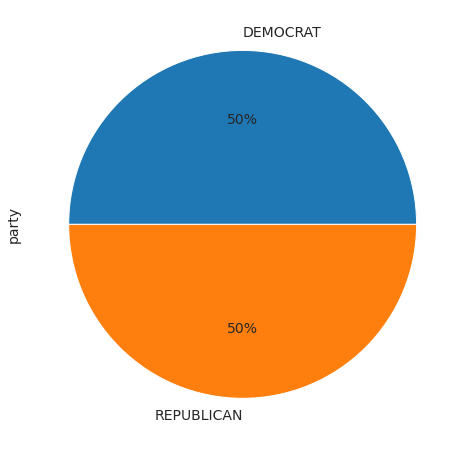

In [99]:
top_freq_candidates_df.party.value_counts().plot.pie(figsize=(16,8),autopct='%.1d%%');

#### Based on the above graph, we can conclude that in general people do not prefer a particular party to another, since the parties elected candidates were on made up an equal share 50-50 since 1976. It means the US population judge not on what party the candidate is but on other aspects.

In [100]:
win_lose = []
for (year,name) in zip(state_num_president_df['year'],state_num_president_df['candidate']):
    if (year,name) in zip(top_freq_candidates_df['year'],top_freq_candidates_df['candidate']):
        win_lose.append(1)
    else:
        win_lose.append(0)
state_num_president_df['winner'] = pd.Series(win_lose)

In [101]:
state_num_president_df

,year,candidate,state,winner
0,1976,"CARTER, JIMMY",24,1
1,1976,"FORD, GERALD",27,0
2,1980,"CARTER, JIMMY",7,0
3,1980,"REAGAN, RONALD",44,1
4,1984,"MONDALE, WALTER",2,0
5,1984,"REAGAN, RONALD",49,1
6,1988,"BUSH, GEORGE W.",40,1
7,1988,"DUKAKIS, MICHAEL",11,0
8,1992,"BUSH, GEORGE W.",18,0
9,1992,"CLINTON, BILL",33,1


#### Above table shows the results of voting by states i.e. from how many states each leading candidate got the highest number of votes between 1976-2020. Or more simplier, how many States supported each candidate 

In [102]:
state_num_president_df = pd.concat([state_num_president_df,presidents_by_votes_df.candidatevotes],axis=1)

In [103]:
state_num_president_df

,year,candidate,state,winner,candidatevotes
0,1976,"CARTER, JIMMY",24,1,23815458
1,1976,"FORD, GERALD",27,0,18723588
2,1980,"CARTER, JIMMY",7,0,3403203
3,1980,"REAGAN, RONALD",44,1,41048304
4,1984,"MONDALE, WALTER",2,0,1216772
5,1984,"REAGAN, RONALD",49,1,53393461
6,1988,"BUSH, GEORGE W.",40,1,39916398
7,1988,"DUKAKIS, MICHAEL",11,0,10123751
8,1992,"BUSH, GEORGE W.",18,0,12751747
9,1992,"CLINTON, BILL",33,1,33669460


#### Lets see if there is any correlation among candidate votes' amount, number of supporting States, winners and losers, and year of election.  

In [104]:
numeric_columns = state_num_president_df.select_dtypes(include=[np.number]).columns
heat_map = state_num_president_df[numeric_columns].corr()

In [105]:
heat_map

,year,state,winner,candidatevotes
year,1.000000e+00,-1.736394e-16,-5.360207e-16,0.450868
state,-1.736394e-16,1.000000e+00,7.150498e-01,0.777916
winner,-5.360207e-16,7.150498e-01,1.000000e+00,0.706912
candidatevotes,4.508683e-01,7.779160e-01,7.069117e-01,1.000000


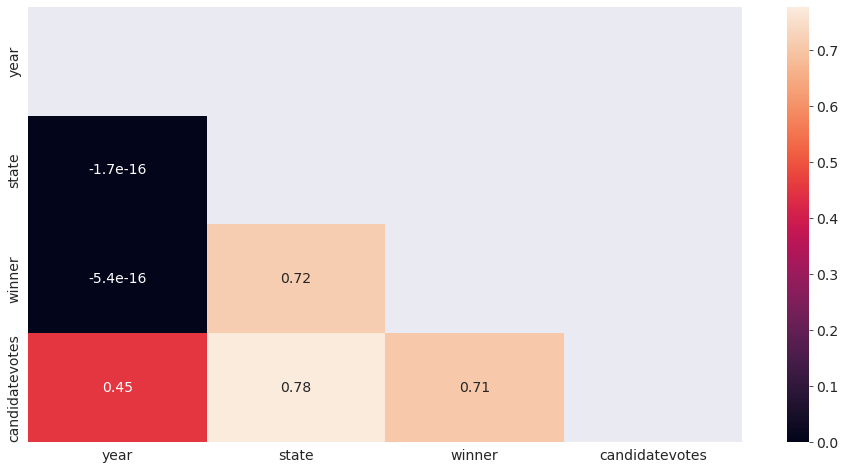

In [106]:
plt.figure(figsize=(16,8))
sns.heatmap(heat_map,annot=True,mask=np.triu(heat_map));

The correlation between 'year' and 'candidatevotes' is 0.45, which is a moderate positive correlation. This suggests that there is some relationship between the year of the election and the number of votes received by the winning candidate, but it is not a strong relationship.
The correlation between 'number of states' and 'candidatevotes' is 0.78, which is a strong positive correlation. This suggests that the number of states won by the winning candidate is strongly related to the number of votes received by that candidate.
The correlation between 'winner' and 'candidatevotes' is 0.71, which is also a strong positive correlation. This suggests that the winner of the election is strongly related to the number of votes received by the winning candidate.
Overall, the correlation matrix indicates that there are strong positive correlations between the number of states won by the winning candidate, the number of votes received by that candidate, and the fact of winning the election. The year of the election has a moderate positive correlation with the number of votes received by the winning candidate, indicating a weaker relationship.

In [107]:
import jovian

In [108]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dildar-ashirov/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter


'https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter'

## Asking and Answering Questions





#### Q1: Who was elected more than anyone as the President of US between 1976-2020?

In [109]:
top_freq_candidates_df.candidate.value_counts()

BUSH, GEORGE W.        3
REAGAN, RONALD         2
CLINTON, BILL          2
OBAMA, BARACK H.       2
CARTER, JIMMY          1
TRUMP, DONALD J.       1
BIDEN, JOSEPH R. JR    1
Name: candidate, dtype: int64

Above code calculates the occurence of unique values in the column 'candidate' of top_freq_candidates_df DataFrame

In [110]:
top_freq_candidates_df_frame = top_freq_candidates_df.candidate.value_counts().to_frame()

I decided to convert the previous Series to DataFrame using to_frame() method and save it  in top_freq_candidates_df_frame 

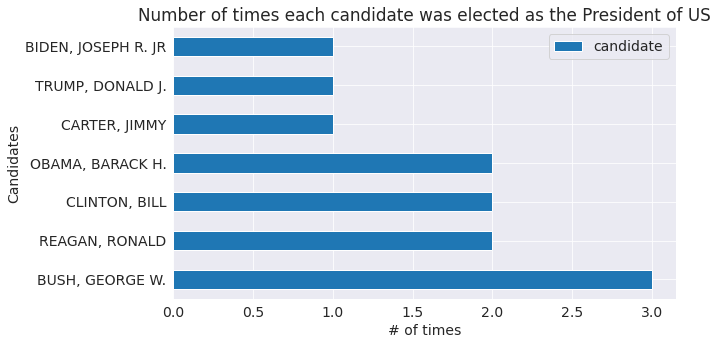

In [111]:
top_freq_candidates_df_frame.plot.barh()
plt.ylabel('Candidates')
plt.xlabel('# of times')
plt.title('Number of times each candidate was elected as the President of US');

Above I used pd.DataFrame.plot.barh() function to draw a horizontal bars with candidate names in y-axis and number of times they were elected in the x-axis.

The candidate who was elected more than anyone as the President of US was Gearge Bush. He was elected 3 times. That is a huge achievment.

#### Q2: Who got the highest number of votes among elected candidates in the history of US Presidential election between 1976-2020?

In [112]:
top_candidates_df = presidents_by_votes_df.groupby('year', as_index=False).apply(lambda x: x.loc[x['candidatevotes'].idxmax(),['candidate','candidatevotes']])

This code line is a bit tricky. First, I decided to group the DataFrame president_by_votes_df by 'year' column values, setting the as_index parameter as False. Second, I decided to use an apply() function where inside I used .loc[] attribute to work with rows and columns, namely I wanted to take the index of the row where max value inside 'candidatevotes' is taken at each year, and corresponding values of two columns, namely 'candidate' and 'candidatevotes'.

In [113]:
top_candidates_df

,year,candidate,candidatevotes
0,1976,"CARTER, JIMMY",23815458
1,1980,"REAGAN, RONALD",41048304
2,1984,"REAGAN, RONALD",53393461
3,1988,"BUSH, GEORGE W.",39916398
4,1992,"CLINTON, BILL",33669460
5,1996,"CLINTON, BILL",36496467
6,2000,"GORE, AL",29159976
7,2004,"BUSH, GEORGE W.",35307401
8,2008,"OBAMA, BARACK H.",53404896
9,2012,"OBAMA, BARACK H.",47616195


This is the result of previous line of code

In [114]:
top_candidates_df[top_candidates_df.candidatevotes==top_candidates_df.candidatevotes.max()]

,year,candidate,candidatevotes
8,2008,"OBAMA, BARACK H.",53404896


I used a mask where I wanted to identify the maximum value in the column 'candidatevotes', and take the row this value corresponds.

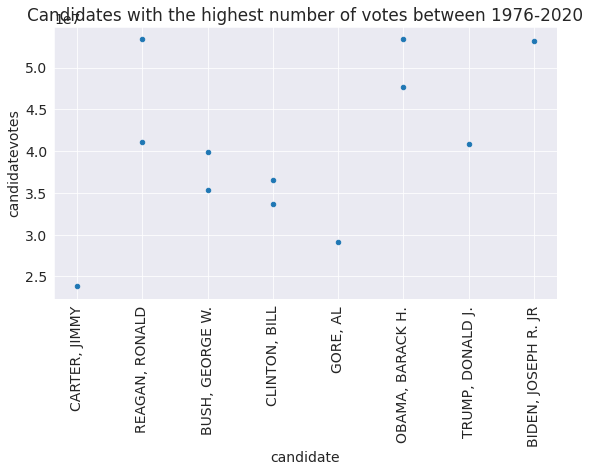

In [115]:
top_candidates_df.plot.scatter(x='candidate',y='candidatevotes')
plt.xticks(rotation=90)
plt.title('Candidates with the highest number of votes between 1976-2020');

Above I used pd.DataFrame.plot.scatter() function to take the scaatter points of votes of each elected candidate. I decided to ignore the 'year' column as it's not my focus right now.

The candidate who got the highest number of votes in the history of US Presidential Election among all candidates since 1976 was Barack Obama. In 2008, he got 53404896 votes, and it is the highest result according to the dataset. 

#### Q3: Was there anyone who participated in the Presidential election more than anyone between 1976-2020?

In [116]:
frequent_candidate = states_supporting_candidates.copy()
frequent_candidate = frequent_candidate.groupby(['candidate'], as_index=False)['year'].count()

I copied the content of one DataFrame to another one, using .copy() function. Then, I grouped this DataFrame, using groupby() by values of column 'candidate', setting it not as index. I counted how many times each candidate appeared between 1976-2020, using .count() function. 

In [117]:
frequent_candidate

,candidate,year
0,"ALEXANDER, STEWART",1
1,"ALLEN, JONATHAN",1
2,"AMONDSON, GENE",2
3,"ANDERSON, JOHN B.",2
4,"ANDERSON, ROSS CARL """"ROCKY""""",1
...,...,...
244,"WRIGHT, MARGARET",1
245,"YANG, ANDREW",1
246,"YIAMOUYIANNIS, JOHN",1
247,"YOUNGKEIT, LOUIE G.",1


Above is the result of previous operation

In [118]:
frequent_candidate[frequent_candidate.year == frequent_candidate.year.max()]

,candidate,year
60,"DODGE, EARL",6


I set a mask that has to identify the row i.e. the candidate who took part in Presidential Election more than anyone, that corresponds to the highest number of occurences using .max() function.

In [119]:
states_supporting_candidates[states_supporting_candidates.candidate=='DODGE, EARL']

,year,candidate,party_simplified,state
40,1984,"DODGE, EARL",OTHER,5
54,1988,"DODGE, EARL",OTHER,3
76,1992,"DODGE, EARL",OTHER,2
96,1996,"DODGE, EARL",OTHER,3
115,2000,"DODGE, EARL",OTHER,1
131,2004,"DODGE, EARL",OTHER,1


To show at which years exactly this candidate participated, I used another mask setting the condition where candidate name should be 'Dodge, Earl'. 

Earl Dodge, who was an American ploitical activist, was the only candidate who proposed his candidate more than anyone, namely 6 times starting from 1984 to 2004. Unfortunately, each election year, the number of supporter States declined gradually.

#### Q4: Why there is a gap in FIPS State codes?

In [120]:
merged_president_df['state_fips'].unique()

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

I've listed unique values inside the column 'state_fips', using .unique() function.

In [121]:
dropped_state_fips = set(np.arange(1,57,dtype=int)).difference(set(merged_president_df.state_fips.values))

To find missing values in our list, I decided to use the function .difference() of set type of data. So, I converted the list to set using set() class, and for comparison I've created a numpy array using np.arange() with starting value 1, and stop value 57 (which is excluded).

In [122]:
dropped_state_fips

{3, 7, 14, 43, 52}

Thus we obtained missing 'state_fips' values

According to FIPS state codes, these missing fips codes correspond to the following states:
* 3 - American Samoa
* 7 - Canal Zone
* 14 - Guam
* 43 - Puerto Rico
* 52 - Virgin Islands

It seems like exactly these states didn't participated in election since 1976. According to Electoral College system, US citizens living in these territories cannot participate in voting for presidential election. That's why we had a gap in FIPS STate Codes.

#### Q5: Is there any correlation between the number of States supported, year of Presidential Election, the fact that the candidate won or lost and the number of votes earned by each leading candidates?

In [123]:
state_num_president_df

,year,candidate,state,winner,candidatevotes
0,1976,"CARTER, JIMMY",24,1,23815458
1,1976,"FORD, GERALD",27,0,18723588
2,1980,"CARTER, JIMMY",7,0,3403203
3,1980,"REAGAN, RONALD",44,1,41048304
4,1984,"MONDALE, WALTER",2,0,1216772
5,1984,"REAGAN, RONALD",49,1,53393461
6,1988,"BUSH, GEORGE W.",40,1,39916398
7,1988,"DUKAKIS, MICHAEL",11,0,10123751
8,1992,"BUSH, GEORGE W.",18,0,12751747
9,1992,"CLINTON, BILL",33,1,33669460


In [124]:
numeric_columns = state_num_president_df.select_dtypes(include=[np.number]).columns
heat_map = state_num_president_df[numeric_columns].corr()

In [125]:
heat_map

,year,state,winner,candidatevotes
year,1.000000e+00,-1.736394e-16,-5.360207e-16,0.450868
state,-1.736394e-16,1.000000e+00,7.150498e-01,0.777916
winner,-5.360207e-16,7.150498e-01,1.000000e+00,0.706912
candidatevotes,4.508683e-01,7.779160e-01,7.069117e-01,1.000000


To calculate the correlation between the column values inside the DataFrame, I used .corr() function and set numeric_only parameter to True, to calculate only those values which are numeric ignoring if other non-numeric values.

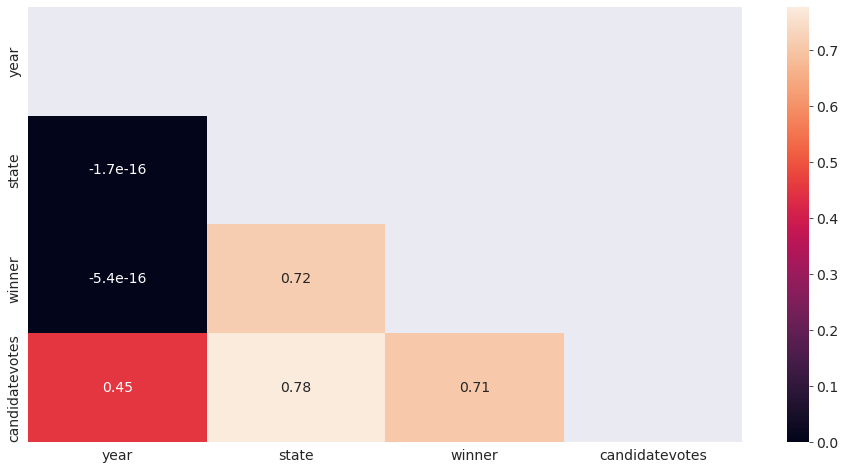

In [126]:
plt.figure(figsize=(16,8))
sns.heatmap(heat_map,annot=True,mask=np.triu(heat_map));


I set up the size of figure using .plt.figure() function setting the parameter figsize = (16,8). To draw the above graph I used .heatmap() function of seaborn library, setting the parameter annot = True, meaning I want the values to be displayed on the graph, and mask=np.triu(heat_map) to ignore the upward triangle matrix since bottom and top are symmetrical to each other, which means I needed only the one half.

The correlation between 'year' and 'candidatevotes' is 0.45, which is a moderate positive correlation. This suggests that there is some relationship between the year of the election and the number of votes received by the winning candidate, but it is not a strong relationship.
The correlation between 'number of states' and 'candidatevotes' is 0.78, which is a strong positive correlation. This suggests that the number of states won by the winning candidate is strongly related to the number of votes received by that candidate.
The correlation between 'winner' and 'candidatevotes' is 0.71, which is also a strong positive correlation. This suggests that the winner of the election is strongly related to the number of votes received by the winning candidate.
Overall, the correlation matrix indicates that there are strong positive correlations between the number of states won by the winning candidate, the number of votes received by that candidate, and the fact of winning the election. The year of the election has a moderate positive correlation with the number of votes received by the winning candidate, indicating a weaker relationship.

# Interesting Finding: Presidential race between George Bush and Al Gore in 2000.

In [127]:
presidents_by_votes_df = presidents_by_states_dff.groupby(['year','candidate'], as_index=False)['candidatevotes'].sum()
presidents_by_votes_df[presidents_by_votes_df.year==2000]

,year,candidate,candidatevotes
12,2000,"BUSH, GEORGE W.",27773762
13,2000,"GORE, AL",29159976


I grouped the DataFrame by two columns, namely 'year' and 'candidate', using .groupby() function, setting as_index=False to avoid these columns being the indices. The values I've been working was 'candidatevotes' and I took the sum, using .sum() function, of its values based on the 'year' and 'candidate' values. Since we were interested in 2000 Presidential Election, I set the mask .year == 2000, and got the rows where year was 2000.

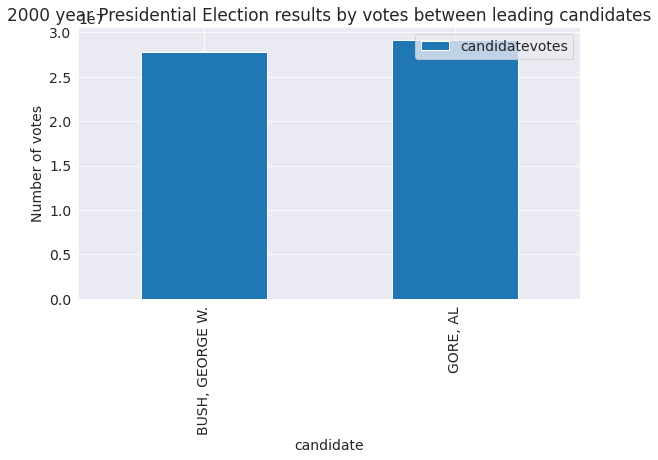

In [128]:
presidents_by_votes_df[presidents_by_votes_df.year==2000].plot.bar(x='candidate',y='candidatevotes')
plt.ylabel('Number of votes')
plt.title('2000 year Presidential Election results by votes between leading candidates');

I used pd.DataFrame.plot.bar() function setting x-axis to 'candidate' column and y-axis to 'candidatevotes', naming the y-axis 'Number of votes', using plt.ylabel() function.

Obviously, Gore Al was winning the Presidential Election race earning more votes than George Bush, but despite this fact, George Bush had won the race and became the President of US. Based on the result, it seems number of votes earned doesn't guarantee anything, since in 2000 the race result was decided by the electoral votes. And George Bush won by electoral votes. According to web resources, it was the most controversial election in US President Election history. That is why, apparently, the correlation between number of votes and the winning result is not exactly 1.

In [129]:
import jovian

In [130]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dildar-ashirov/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter


'https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter'

## Inferences and Conclusion

This dataset has revealed many interesting and informative insights. Several insights we could identify during our analysis: 
* The number of votes earned doesn't necessarily result in desired results in Presidential Election e.g. 2000 Presidential Election, but despite this there is indeed a high positive correlation between number of votes and winning results. Also it was clear that number of supporting states and votes earned is highly correlated;
* The candidate who got the highest number of votes in the history of Presidential Election between 1976-2020 was Barack Obama with over 53 million votes. It was the record.
* The candidate who won Presidential Election more than anyone was George Bush (3 times), and candidate who participated more than anyone was Earl Dodge (6 times).
* Some States are not allowed to participate in Presidential Election. They are: American Samoa, Canal Zone, Guam, Puerto Rico and Virgin Islands.
* Most of the time, candidates who were favored by the Callifornia State citizens, had higher chances of earning more votes than anyone else, since based on our data analysis, Callifornia was indeed one fo the driving factors that could totally decide the race outcome.
* It was identified that US citizens are not bias i.e. they do not prefer one particular party to another, since the parties the elected candidates were on made up an equal share since 1976 i.e. 50 by 50.
In general, the dataset gave valuable insights and interesting findings.

In [131]:
import jovian

In [132]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dildar-ashirov/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter


'https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter'

## References and Future Work

We could identify some interesting data and how they correlate with each other. I think it would be helpfull to look at some related dataset that possibly could give us more information on particular details. Also, we have had some questions the answers for which I couldn't obtain from this dataset. And as I said, more related datasets could give us more insights and possibly the answers for my questions. Right now, I cannot say for sure I'm gonna investigate this dataset any further since I'd like to look at some other datasets and see if I can find other interesting things, patterns and correlations. This is the end of my project.

In [133]:
import jovian

In [135]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dildar-ashirov/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter


'https://jovian.com/dildar-ashirov/zerotopandas-course-project-starter'